In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [6]:
# 한글 폰트
plt.rc("font", family = 'AppleGothic')
plt.rc("axes", unicode_minus = False)

# 글씨 선명하게
set_matplotlib_formats("retina")

In [7]:
ads_list = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고목록.csv')
print(f"데이터 수 : {ads_list.shape}")
ads_list.head()

데이터 수 : (445260, 26)


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,160,tr71opm6C1,6,10,13604,1,1,리니지레드나이츠,"리니지레드나이츠,com.ncsoft.redknights,ecaab3f9d2616f6...",https://lh3.googleusercontent.com/oDGXxngO9oOP...,...,0,100,2,170,150,982800,NONE,Y,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,13605,1,1,강철의함대:Ocean Overlord,"강철의함대:Ocean Overlord,com.gamepub.lw.g,a370ab70...",http://nextapps-nas.aws.appang.kr/icon/2016122...,...,0,100,2,180,160,987200,NONE,Y,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,13606,1,1,스노우 SNOW,"스노우 SNOW,com.campmobile.snow,5b892d7e0cff73621...",http://nextapps-nas.aws.appang.kr/icon/2016092...,...,0,100,2,160,160,987300,NONE,Y,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,13607,2,1,서머너즈 워: 천공의 아레나,"서머너즈 워: 천공의 아레나,com.com2us.smon.normal.freeful...",http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,...,0,100,2,230,210,931000,NONE,Y,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,23543,1,1,하이마트,"하이마트,com.himart.main,8230c6a95581533fad10b0e3b...",http://nextapps-nas.aws.appang.kr/icon/2016032...,...,0,100,2,170,140,1155100,NONE,Y,2017-06-12 15:24:46,N


In [8]:
ads_info = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정2_광고참여정보.csv')
print(f"데이터 수 : {ads_info.shape}")
ads_info.head()

데이터 수 : (16854865, 14)


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,converted
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,0
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,1
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,1
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,0
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,0


In [9]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
print(f"데이터 수 : {domain.shape}")
domain.head()

데이터 수 : (16854865, 22)


,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
part_earn = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/참여적립조인.csv')
print(f"데이터 수 : {part_earn.shape}")
part_earn.head()

데이터 수 : (16854865, 22)


,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
ads_time = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_time.shape}")
ads_time.head()

데이터 수 : (6953146, 12)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말


In [12]:
domain = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/광고도메인리스트.csv')
print(f"데이터 수 : {domain.shape}")
domain.head()

데이터 수 : (9517, 23)


,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [13]:
ads_timee = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_timee.shape}")
ads_timee.head()

데이터 수 : (6953146, 12)


,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말


In [14]:
ads_time["rpt_time_date"].nunique()

399

In [15]:
ads_rwd = pd.read_csv('/Users/sparta/Documents/GitHub/final_project/data/수정_광고적립.csv')
print(f"데이터 수 : {ads_rwd.shape}")
ads_rwd.head()

데이터 수 : (1475031, 14)


,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit,cost_diff
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271,70
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465,70
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241,70
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231,70
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57,65


In [16]:
ads_info = ads_info.merge(domain[['ads_idx', 'domain']], on='ads_idx', how='left')


In [17]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', 'ads_sdate', 
                         'ads_age_min', 'ads_age_max', 'regdate', 'ads_contract_price', 'ads_reward_price'], axis = 1)

In [18]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'dvc_idx', 'user_ip'], axis=1)

In [19]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [20]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [21]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [22]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [23]:
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79


In [24]:
# 1) 데이터 준비 (숫자 변환 + 결측치 0)
X = domain_features.apply(pd.to_numeric, errors='coerce').fillna(0.0)

# 전부 0인 행 제거 (클러스터링 불가능한 행 제거)
nz_mask = (X.sum(axis=1) > 0)
X = X[nz_mask]

# 2) k 값별 Silhouette 계산
sil_scores = {}
k_max = min(11, X.shape[0])  # 표본 수보다 k 크면 안됨
for k in range(2, k_max):  # k=2~10
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    sizes = np.bincount(labels)

    if len(set(labels)) > 1 and sizes.min() >= 2:
        sil_scores[k] = silhouette_score(X, labels)

# 3) 결과 출력
if sil_scores:
    print("k별 Silhouette 점수:", {k: round(v,3) for k,v in sil_scores.items()})
    best_k = max(sil_scores, key=sil_scores.get)
    print(f"최적 k = {best_k}, silhouette = {sil_scores[best_k]:.3f}")
else:
    print("유효한 Silhouette 점수를 계산하지 못했습니다.")

# 4) 그래프 시각화
if sil_scores:
    plt.figure(figsize=(6,4))
    plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score by k (도메인 Features)")
    plt.grid(True)
    plt.show()


유효한 Silhouette 점수를 계산하지 못했습니다.


In [25]:
ads_time['rpt_time_date'] = pd.to_datetime(ads_time['rpt_time_date'], errors='coerce')
ads_time = ads_time[ads_time['rpt_time_date'] >= '2025-07-27']

ads_time['weekday'] = ads_time['rpt_time_date'].dt.dayofweek  # 0=월 ~ 6=일

def daypart(h):
    if 6 <= h < 10:  return '아침(06-10)'
    if 10 <= h < 14: return '낮(10-14)'
    if 14 <= h < 18: return '오후(14-18)'
    if 18 <= h < 22: return '저녁(18-22)'
    if 22 <= h or h < 2: return '심야(22-02)'
    return '새벽(02-06)'

ads_time['daypart'] = ads_time['rpt_time_time'].apply(daypart)

In [26]:
summary = (
    ads_time.groupby(['mda_idx','weekday','daypart'], as_index=False)
            .agg(clicks=('rpt_time_clk','sum'),
                 turns=('rpt_time_turn','sum'))
)

In [27]:
summary['cvr'] = np.where(summary['clicks'] > 0,
                          summary['turns'] / summary['clicks'], 0.0)
summary = summary.replace([np.inf, -np.inf], 0.0)


In [28]:
best_eff = (summary.sort_values(['mda_idx','cvr'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최고 효율'))

best_clk = (summary.sort_values(['mda_idx','clicks'], ascending=[True, False])
                   .groupby('mda_idx', as_index=False)
                   .head(1)
                   .assign(type='최다 클릭'))

final_result = pd.concat([best_eff, best_clk], ignore_index=True)


In [29]:
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
final_result['weekday_name'] = final_result['weekday'].map(weekday_map)

eff = final_result[final_result['type']=='최고 효율'] \
        .rename(columns={'weekday_name':'weekday_name_eff',
                         'daypart':'daypart_eff',
                         'clicks':'clicks_eff',
                         'turns':'turns_eff',
                         'cvr':'cvr_eff'}) \
        [['mda_idx','weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff']]

vol = final_result[final_result['type']=='최다 클릭'] \
        .rename(columns={'weekday_name':'weekday_name_vol',
                         'daypart':'daypart_vol',
                         'clicks':'clicks_vol',
                         'turns':'turns_vol',
                         'cvr':'cvr_vol'}) \
        [['mda_idx','weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol']]


In [30]:
time_report = eff.merge(vol, on='mda_idx', how='outer')

In [31]:
time_report['slot_match'] = (
    (time_report['weekday_name_eff'] == time_report['weekday_name_vol']) &
    (time_report['daypart_eff'] == time_report['daypart_vol'])
)


In [32]:
time_report = time_report[[
    'mda_idx',
    'weekday_name_eff','daypart_eff','clicks_eff','turns_eff','cvr_eff',
    'weekday_name_vol','daypart_vol','clicks_vol','turns_vol','cvr_vol',
    'slot_match'
]].sort_values('mda_idx').reset_index(drop=True)

In [33]:
time_report

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁(18-22),3550,1716,0.483380,토,새벽(02-06),21824,9273,0.424899,False
1,14,금,심야(22-02),5261,2125,0.403916,금,심야(22-02),5261,2125,0.403916,True
2,18,월,낮(10-14),174,15,0.086207,수,저녁(18-22),268,9,0.033582,False
3,22,금,아침(06-10),2346,1561,0.665388,일,새벽(02-06),3689,1888,0.511792,False
4,26,목,새벽(02-06),17,8,0.470588,일,아침(06-10),49,4,0.081633,False
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1051,화,심야(22-02),4,3,0.750000,화,심야(22-02),4,3,0.750000,True
187,1055,일,심야(22-02),3,0,0.000000,일,심야(22-02),3,0,0.000000,True
188,1057,수,낮(10-14),1,1,1.000000,화,저녁(18-22),2,1,0.500000,False
189,1059,금,오후(14-18),6,0,0.000000,금,오후(14-18),6,0,0.000000,True


In [34]:
time_report["daypart_eff"] = time_report["daypart_eff"].str.replace(r"\(.*\)", "", regex=True).str.strip()
time_report["daypart_vol"] = time_report["daypart_vol"].str.replace(r"\(.*\)", "", regex=True).str.strip()


In [35]:
time_report

,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,weekday_name_vol,daypart_vol,clicks_vol,turns_vol,cvr_vol,slot_match
0,12,목,저녁,3550,1716,0.483380,토,새벽,21824,9273,0.424899,False
1,14,금,심야,5261,2125,0.403916,금,심야,5261,2125,0.403916,True
2,18,월,낮,174,15,0.086207,수,저녁,268,9,0.033582,False
3,22,금,아침,2346,1561,0.665388,일,새벽,3689,1888,0.511792,False
4,26,목,새벽,17,8,0.470588,일,아침,49,4,0.081633,False
...,...,...,...,...,...,...,...,...,...,...,...,...
186,1051,화,심야,4,3,0.750000,화,심야,4,3,0.750000,True
187,1055,일,심야,3,0,0.000000,일,심야,3,0,0.000000,True
188,1057,수,낮,1,1,1.000000,화,저녁,2,1,0.500000,False
189,1059,금,오후,6,0,0.000000,금,오후,6,0,0.000000,True


In [36]:
# 1. 사용할 변수 선택 (범주형 + 성과지표)
cat_cols = ['weekday_name_eff', 'daypart_eff']
num_cols = ['clicks_eff', 'turns_eff', 'cvr_eff']

# 2. 범주형 원핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(time_report[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 3. 결합
X = pd.concat([
    pd.DataFrame(encoded, columns=encoded_cols, index=time_report.index),
    time_report[num_cols].reset_index(drop=True)
], axis=1)

# 4. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. KMeans 클러스터링 (예: k=3~5)
for k in [3,4,5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    time_report[f'cluster_{k}_time'] = labels
    
    print("="*12, f"k={k} 결과", "="*12)
    print(time_report.groupby(f'cluster_{k}_time')[num_cols].mean())


============ k=3 결과 ============
                  clicks_eff    turns_eff   cvr_eff
cluster_3_time                                     
0                 290.008197   142.868852  0.732489
1                 282.890625   180.437500  0.722196
2               12068.600000  7925.400000  0.663277
============ k=4 결과 ============
                  clicks_eff    turns_eff   cvr_eff
cluster_4_time                                     
0                 443.593750   214.156250  0.651408
1                 262.761468   153.853211  0.660578
2                 236.666667   119.000000  0.949694
3               12068.600000  7925.400000  0.663277
============ k=5 결과 ============
                  clicks_eff    turns_eff   cvr_eff
cluster_5_time                                     
0                 193.918605   112.558140  0.645690
1                 247.581395   124.395349  0.924099
2                 443.593750   214.156250  0.651408
3               12068.600000  7925.400000  0.663277
4                

In [37]:
# --- 클러스터별 매체사 목록 뽑기 (k=3,4,5 모두) ---

ks = [3, 4, 5]

def get_cluster_members(df, cluster_col):
    """
    df: time_report
    cluster_col: 'cluster_3_time' 같은 컬럼명
    return:
      - unique_mda: {클러스터: [고유 mda_idx 리스트]}
      - detailed:   {클러스터: [(mda_idx, weekday, daypart) ...] 리스트}
    """
    # 필요한 컬럼만
    tmp = df[['mda_idx', 'weekday_name_eff', 'daypart_eff', cluster_col]].copy()

    # 1) 클러스터별 '고유 매체사' 리스트
    unique_mda = {
        c: sorted(tmp.loc[tmp[cluster_col] == c, 'mda_idx'].unique().tolist())
        for c in sorted(tmp[cluster_col].unique())
    }

    # 2) 클러스터별 '(매체사, 요일, 시간대)' 상세 리스트
    detailed = {
        c: tmp.loc[tmp[cluster_col] == c, ['mda_idx','weekday_name_eff','daypart_eff']] \
              .sort_values(['mda_idx','weekday_name_eff','daypart_eff']) \
              .apply(tuple, axis=1).tolist()
        for c in sorted(tmp[cluster_col].unique())
    }
    return unique_mda, detailed


for k in ks:
    col = f'cluster_{k}_time'
    unique_mda, detailed = get_cluster_members(time_report, col)

    print("="*12, f"k={k} ({col})", "="*12)
    # 고유 매체사 리스트 출력
    for c, mda_list in unique_mda.items():
        print(f"\n=== Cluster {c} 매체사(고유) ===")
        print(mda_list[:20])   # 길면 앞 20개만 미리보기
        print(f"... 총 {len(mda_list)}개 매체사")

    # 필요 시 상세 조합도 확인
    # for c, combos in detailed.items():
    #     print(f"\n--- Cluster {c} (mda_idx, 요일, 시간대) 조합 ---")
    #     print(combos[:20])
    #     print(f"... 총 {len(combos)}개 조합")


============ k=3 (cluster_3_time) ============

=== Cluster 0 매체사(고유) ===
[12, 14, 18, 22, 30, 32, 54, 56, 73, 87, 108, 270, 281, 291, 337, 344, 356, 371, 374, 375]
... 총 122개 매체사

=== Cluster 1 매체사(고유) ===
[26, 246, 290, 294, 303, 324, 340, 341, 389, 397, 409, 442, 482, 578, 579, 582, 637, 638, 639, 643]
... 총 64개 매체사

=== Cluster 2 매체사(고유) ===
[58, 342, 343, 396, 563]
... 총 5개 매체사
============ k=4 (cluster_4_time) ============

=== Cluster 0 매체사(고유) ===
[30, 324, 375, 385, 458, 496, 578, 579, 583, 621, 643, 672, 675, 682, 683, 684, 687, 688, 700, 701]
... 총 32개 매체사

=== Cluster 1 매체사(고유) ===
[12, 18, 26, 32, 56, 73, 87, 108, 246, 270, 281, 290, 291, 294, 303, 341, 344, 356, 371, 374]
... 총 109개 매체사

=== Cluster 2 매체사(고유) ===
[14, 22, 54, 337, 340, 389, 480, 582, 645, 651, 654, 671, 676, 677, 678, 685, 702, 711, 718, 725]
... 총 45개 매체사

=== Cluster 3 매체사(고유) ===
[58, 342, 343, 396, 563]
... 총 5개 매체사
============ k=5 (cluster_5_time) ============

=== Cluster 0 매체사(고유) ===
[18, 73, 87,

In [38]:
time_report['cluster_5_time'].value_counts()

cluster_5_time
0    86
1    43
2    32
4    25
3     5
Name: count, dtype: int64

In [39]:
# k=5 클러스터 결과 확인
cols_to_show = [
    'mda_idx', 'weekday_name_eff', 'daypart_eff',
    'clicks_eff', 'turns_eff', 'cvr_eff',
    'cluster_5_time'
]

# 전체 매체사별 클러스터 결과 보기
display(time_report[cols_to_show].sort_values(['cluster_5_time','mda_idx']))


,mda_idx,weekday_name_eff,daypart_eff,clicks_eff,turns_eff,cvr_eff,cluster_5_time
2,18,월,낮,174,15,0.086207,0
10,73,화,오후,4,1,0.250000,0
11,87,월,아침,2,1,0.500000,0
12,108,화,아침,1,1,1.000000,0
13,246,월,새벽,32,33,1.031250,0
...,...,...,...,...,...,...,...
144,973,목,낮,1,1,1.000000,4
158,1018,목,오후,9,3,0.333333,4
159,1019,목,새벽,9,10,1.111111,4
170,1030,목,저녁,2,3,1.500000,4


In [40]:
# 요일+시간대만 인코딩
X_time = encoder.fit_transform(time_report[['weekday_name_eff','daypart_eff']])

kmeans = KMeans(n_clusters=4, n_init=50, random_state=42)
time_report['cluster_time'] = kmeans.fit_predict(X_time)

print(time_report.groupby('cluster_time')[['weekday_name_eff','daypart_eff']].value_counts())


cluster_time  weekday_name_eff  daypart_eff
0             금                 오후              9
              월                 낮               8
              목                 오후              7
                                낮               6
              월                 아침              5
              금                 낮               3
              수                 아침              3
              월                 오후              3
              화                 아침              3
                                오후              3
              금                 아침              2
              목                 아침              2
              수                 오후              2
              화                 낮               2
              수                 낮               1
              일                 낮               1
                                오후              1
              토                 아침              1
                                오후              1
1     

In [41]:
# 클러스터 라벨이 붙은 테이블에서 고유 매체사만
result_time = time_report[['mda_idx', 'weekday_name_eff', 'daypart_eff', 'cluster_time']].copy()

# 각 클러스터에 속한 '고유 mda_idx' 리스트 만들기
cluster_members = {
    c: sorted(result_time.loc[result_time['cluster_time'] == c, 'mda_idx'].unique().tolist())
    for c in sorted(result_time['cluster_time'].unique())
}

# 확인 출력
for c, mda_list in cluster_members.items():
    print(f"=== Cluster {c} 매체사(고유) ===")
    print(mda_list[:20])  # 너무 많으면 앞 20개만 미리보기
    print(f"... 총 {len(mda_list)}개 매체사\n")


=== Cluster 0 매체사(고유) ===
[18, 22, 32, 54, 56, 73, 87, 108, 270, 281, 291, 337, 342, 344, 356, 375, 396, 398, 401, 437]
... 총 63개 매체사

=== Cluster 1 매체사(고유) ===
[26, 58, 246, 290, 294, 303, 324, 340, 341, 389, 397, 409, 442, 482, 578, 579, 582, 637, 638, 639]
... 총 65개 매체사

=== Cluster 2 매체사(고유) ===
[14, 30, 343, 371, 384, 385, 492, 496, 540, 562, 563, 621, 630, 671, 710, 714, 718, 740, 769, 792]
... 총 29개 매체사

=== Cluster 3 매체사(고유) ===
[12, 374, 458, 480, 564, 568, 676, 677, 678, 684, 685, 716, 725, 758, 760, 774, 796, 797, 980, 995]
... 총 34개 매체사



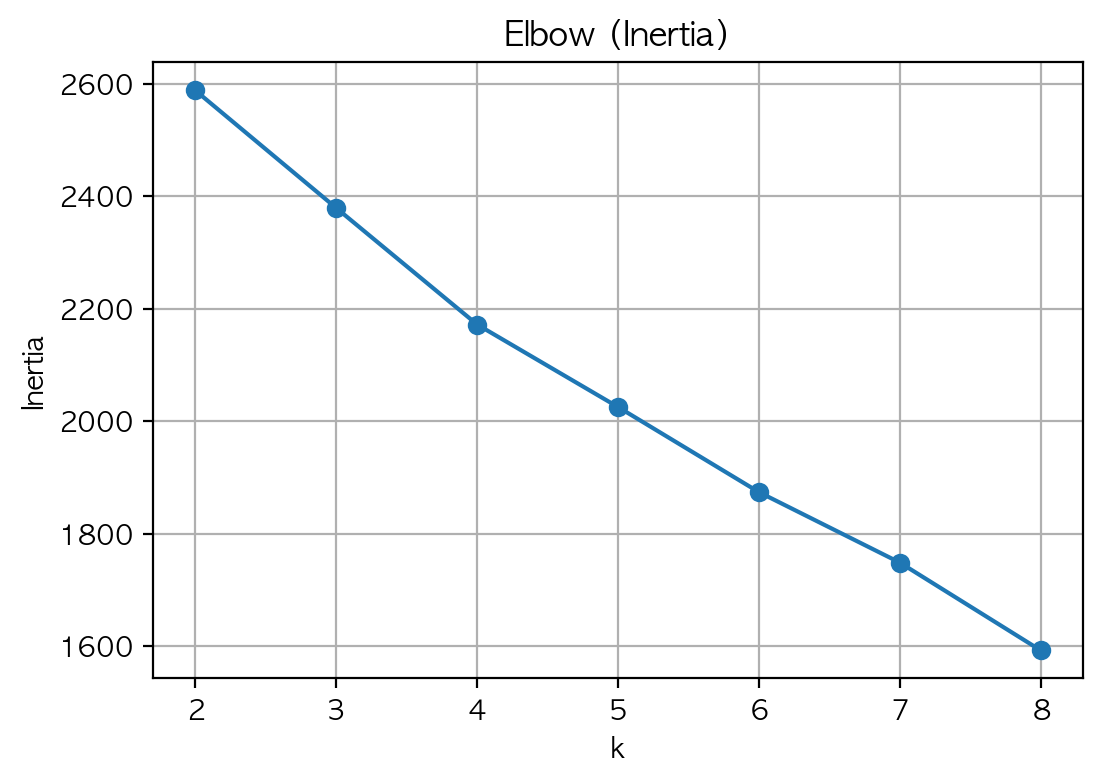

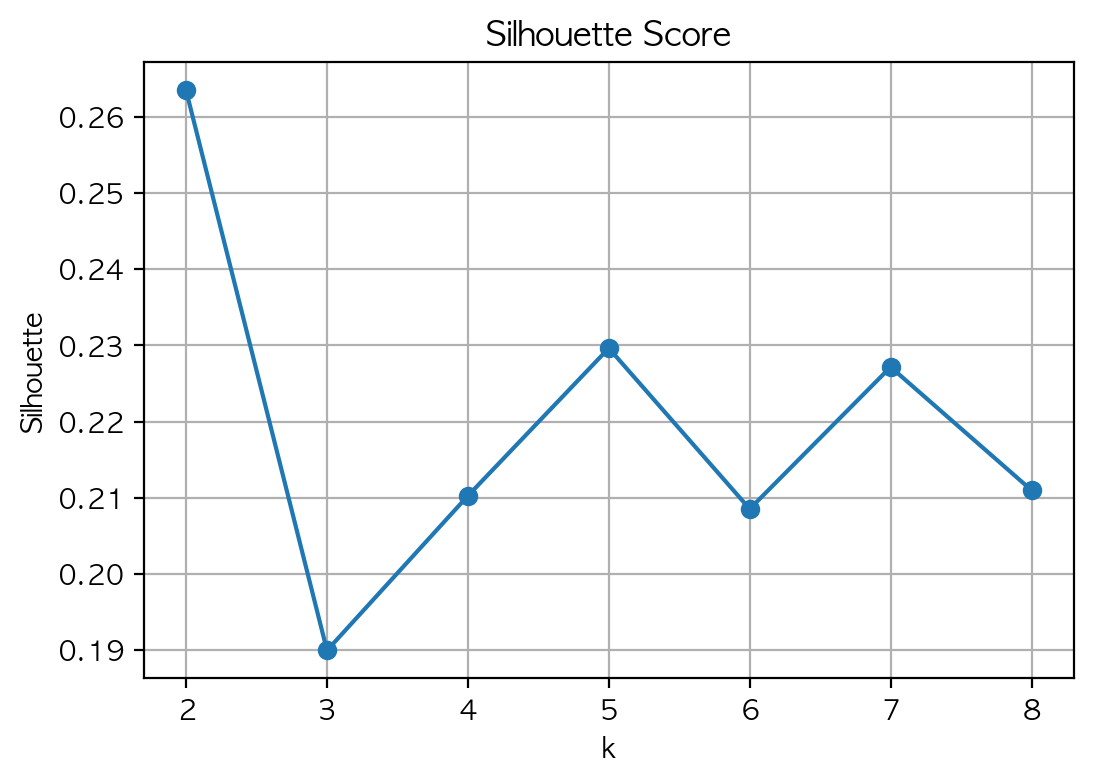

[INFO] 선택된 k = 2


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
cluster,,,,,,,,,,,,,,,
0,0.355082,0.008154,0.052659,0.020280,0.050731,0.026844,0.030234,0.060569,0.045059,0.037800,0.011555,0.052461,0.043568,0.027541,0.177462
1,0.196989,0.000074,0.382529,0.000465,0.139530,0.023124,0.005997,0.063444,0.020234,0.002717,0.000243,0.005523,0.003676,0.106192,0.049261


,top_domains
cluster,
0,"게임(35.51%), 커머스(17.75%), 생활(6.06%), 금융(5.27%),..."
1,"금융(38.25%), 게임(19.70%), 미디어/컨텐츠(13.95%), 채용(10..."


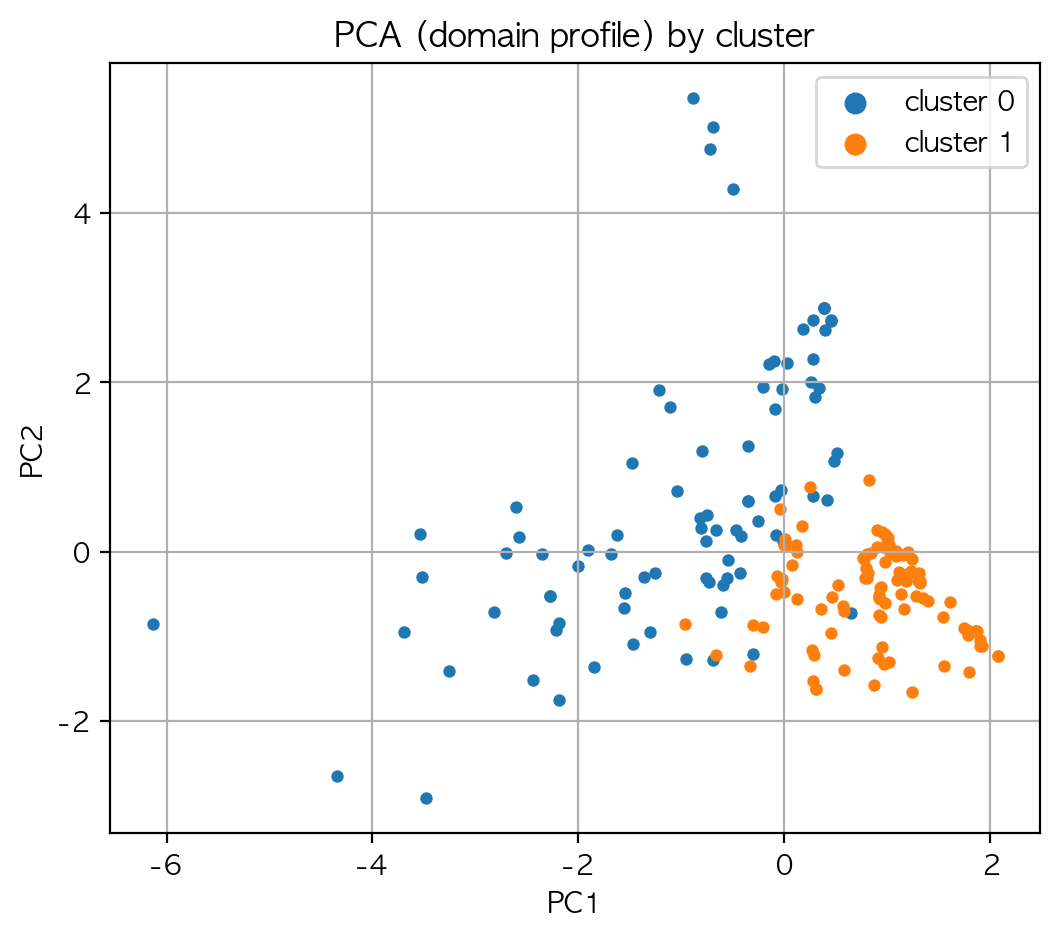

[DONE] mda_idx 클러스터링 완료


In [42]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]
df = domain_features.copy()

# 결측치/무한대 정리
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# 클러스터별 도메인 분포(평균)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


========== k=3 결과 ==========


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),..."
2,"금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10..."


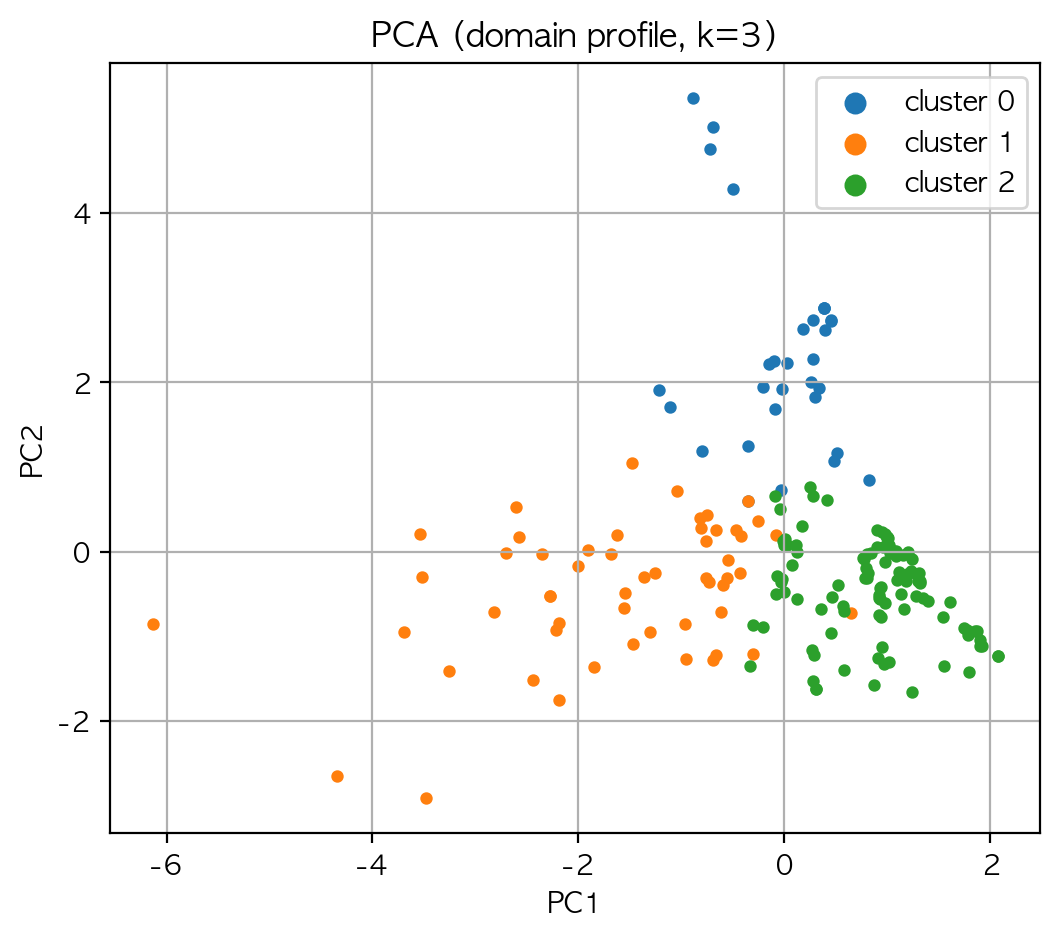

========== k=4 결과 ==========


,top_domains
cluster,
0,"게임(67.09%), 비영리/공공(5.03%), 식음료(5.02%), 커머스(4.3..."
1,"커머스(28.71%), 게임(11.88%), 생활(8.19%), 식당/카페(7.57..."
2,"운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00..."
3,"금융(37.92%), 게임(20.24%), 미디어/컨텐츠(13.53%), 채용(10..."


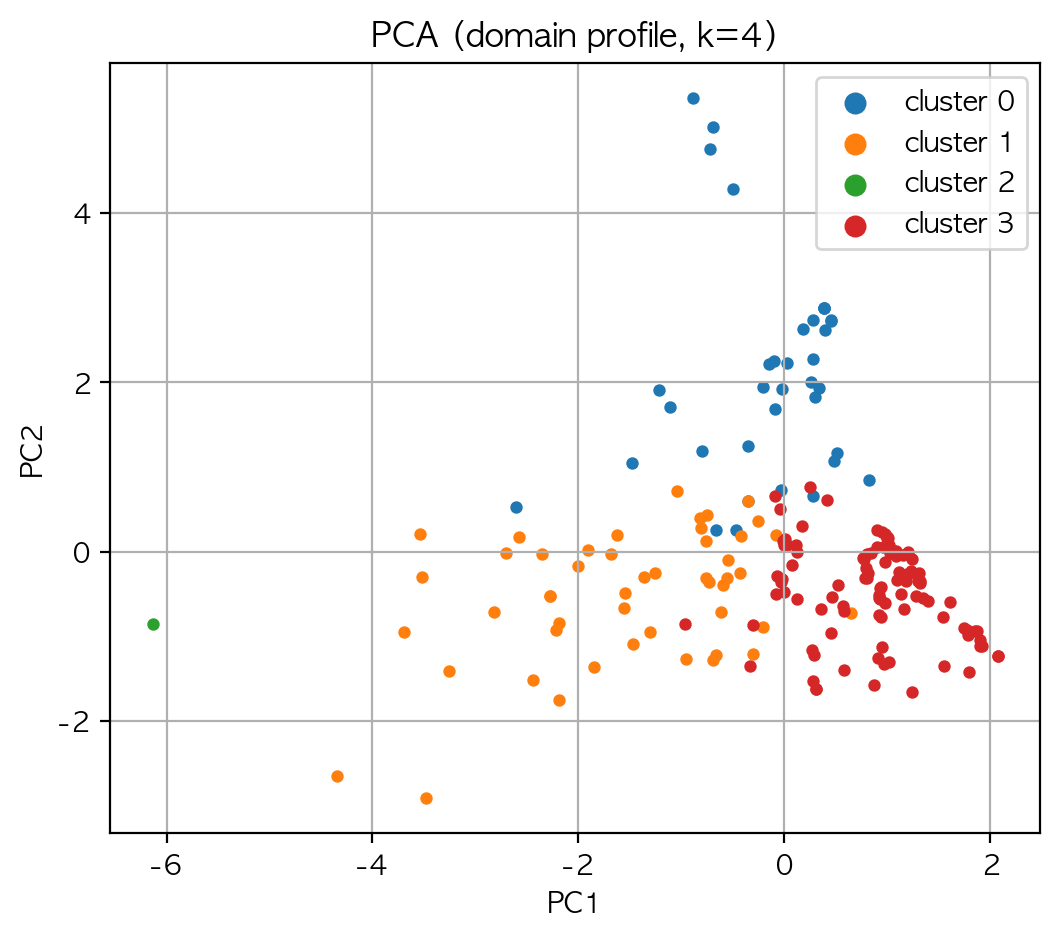

========== k=5 결과 ==========


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(26.18%), 게임(12.16%), 운세(7.66%), 생활(7.59%),..."
2,"운동/스포츠(50.00%), 운세(50.00%), 게임(0.00%), 교육(0.00..."
3,"교육(33.33%), 미디어/컨텐츠(33.33%), 커머스(33.33%), 게임(0..."
4,"금융(37.86%), 게임(20.68%), 미디어/컨텐츠(13.72%), 채용(10..."


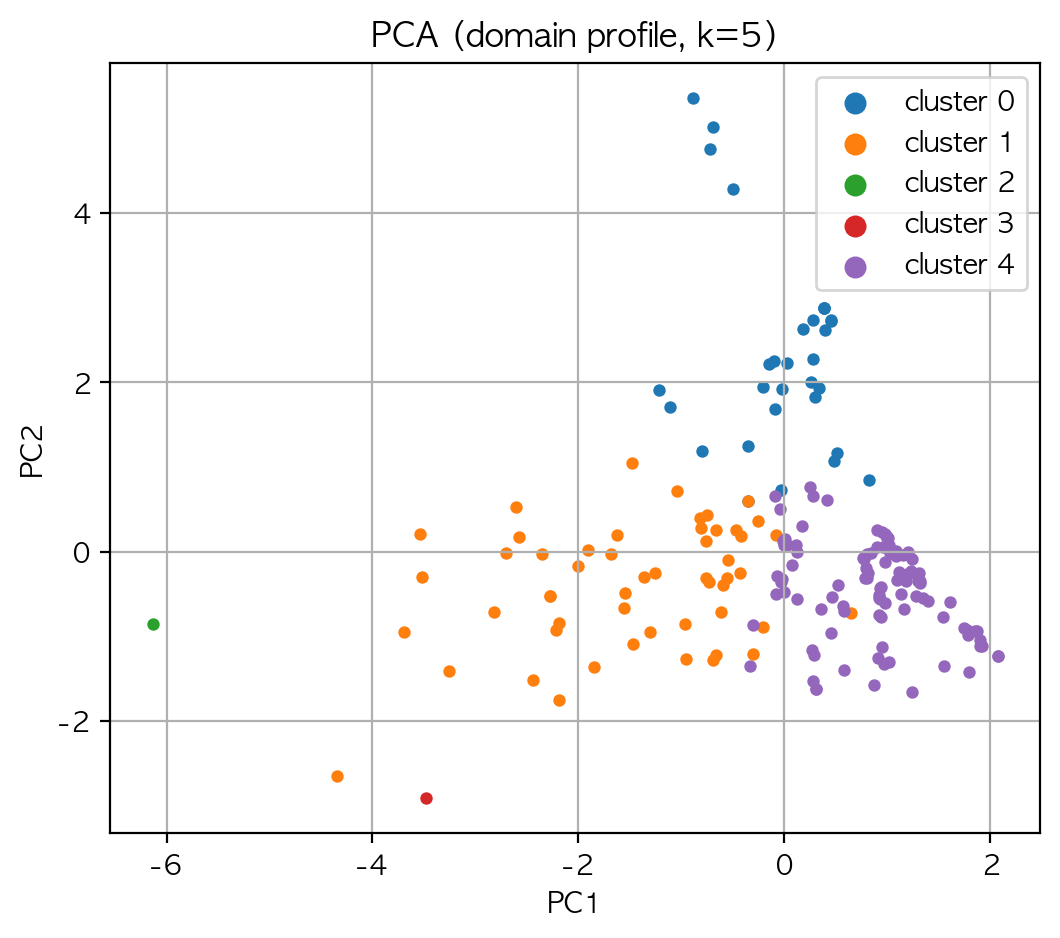

In [43]:
# ==============================
# k=3,4,5 클러스터링 결과 비교
# ==============================

for k in [3, 4, 5]:
    print("="*10, f"k={k} 결과", "="*10)
    
    # KMeans 학습
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # 결과 저장
    result = pd.DataFrame(index=df_ratio.index)
    result["cluster"] = labels
    
    # 클러스터 프로필
    cluster_profile = (
        pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
        .assign(cluster=labels)
        .groupby("cluster")
        .mean()
        .sort_index()
    )
    
    # 각 클러스터 대표 도메인 Top-N
    def top_domains(profile_row, topn=5):
        s = profile_row.sort_values(ascending=False).head(topn)
        return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

    topn = 5
    top_table = pd.DataFrame({
        "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
    }, index=cluster_profile.index)

    display(top_table)   # 클러스터별 상위 도메인 요약
    
    # PCA 시각화
    pca = PCA(n_components=2, random_state=42)
    coords = pca.fit_transform(X_scaled)

    plt.figure(figsize=(6,5))
    for c in range(k):
        idx = (labels == c)
        plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
    plt.title(f"PCA (domain profile, k={k})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(markerscale=2)
    plt.grid(True)
    plt.show()


============ k=3 결과 ============
- 관성(Inertia): 2,369.14
- 실루엣 점수(Silhouette): 0.1857

[클러스터 분포]


,count
cluster,
0,31
1,54
2,104



[클러스터 프로필(평균, 원 스케일)]


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
cluster,,,,,,,,,,,,,,,
0,0.7447,0.0001,0.0332,0.0369,0.0307,0.0075,0.0092,0.0325,0.0033,0.0198,0.0004,0.0068,0.0241,0.0033,0.0475
1,0.1193,0.0130,0.0615,0.0103,0.0677,0.0391,0.0400,0.0745,0.0687,0.0481,0.0178,0.0844,0.0540,0.0428,0.2590
2,0.2048,0.0001,0.3806,0.0009,0.1358,0.0226,0.0075,0.0646,0.0207,0.0031,0.0004,0.0030,0.0045,0.1048,0.0469



[클러스터별 상위 도메인 Top-5]


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), ..."
1,"커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%),..."
2,"금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10..."



[라벨이 붙은 개체별 결과(상위 10개 미리보기)]


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스,cluster
mda_idx,,,,,,,,,,,,,,,,
12,0.8082,0.0000,0.0171,0.0000,0.0002,0.0000,0.0314,0.0064,0.0000,0.0028,0.0000,0.0000,0.0006,0.0000,0.1333,0
14,0.4585,0.0000,0.0420,0.0007,0.1859,0.0701,0.0000,0.0737,0.0000,0.0759,0.0000,0.0000,0.0567,0.0105,0.0260,0
18,0.5561,0.0000,0.1533,0.0000,0.1795,0.0000,0.0000,0.1035,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0075,0
22,0.4468,0.0002,0.1410,0.0000,0.1915,0.0064,0.0577,0.0344,0.0003,0.0137,0.0044,0.0005,0.0295,0.0379,0.0357,2
26,0.6239,0.0000,0.0605,0.0000,0.0295,0.0000,0.0000,0.1696,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1165,0
30,0.0370,0.0002,0.1362,0.0000,0.0477,0.0514,0.0008,0.0027,0.0000,0.0025,0.0000,0.0006,0.0012,0.7145,0.0052,2
32,0.0000,0.0000,0.2891,0.0000,0.1963,0.0000,0.0000,0.0515,0.0000,0.0000,0.0000,0.0000,0.4034,0.0000,0.0597,1
54,0.1245,0.0030,0.1425,0.0000,0.0301,0.0119,0.0574,0.0514,0.0007,0.0158,0.0012,0.3575,0.0185,0.0613,0.1242,1
56,0.5646,0.0000,0.1478,0.0000,0.0104,0.0000,0.0000,0.0352,0.0000,0.0000,0.0000,0.0369,0.1447,0.0000,0.0603,0


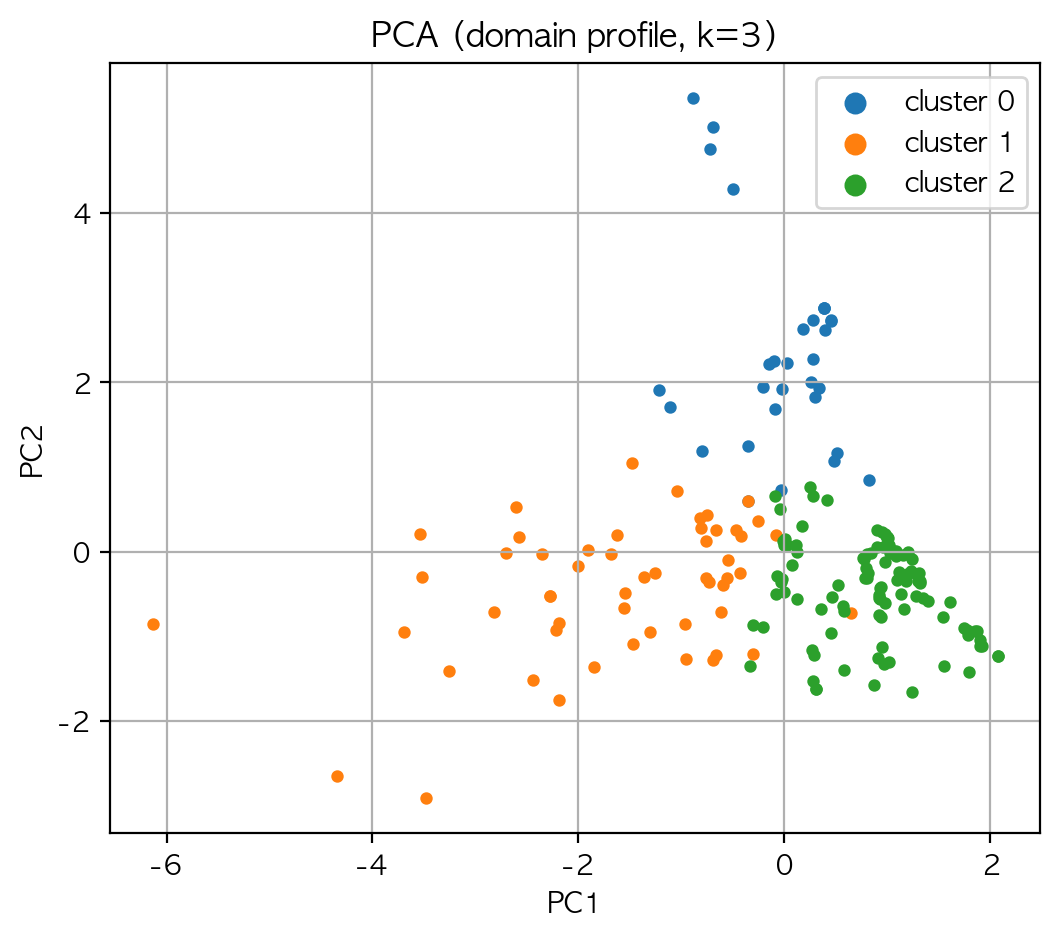

In [44]:
# 보기 옵션 (원하면 조정)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

k = 3
print("="*12, f"k={k} 결과", "="*12)

# 1) KMeans 학습
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 2) 기본 지표
inertia = kmeans.inertia_
sil = silhouette_score(X_scaled, labels) if len(np.unique(labels)) > 1 else np.nan
print(f"- 관성(Inertia): {inertia:,.2f}")
print(f"- 실루엣 점수(Silhouette): {sil:,.4f}")

# 3) 결과 라벨 DataFrame
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 분포
print("\n[클러스터 분포]")
display(result["cluster"].value_counts().sort_index().rename("count").to_frame())

# 5) 클러스터 프로필(원 스케일 X에서 평균)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

print("\n[클러스터 프로필(평균, 원 스케일)]")
display(cluster_profile)

# 6) 각 클러스터 대표 도메인 Top-N
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

print(f"\n[클러스터별 상위 도메인 Top-{topn}]")
display(top_table)

# 7) 원본 인덱스에 라벨 붙인 표(미리보기)
print("\n[라벨이 붙은 개체별 결과(상위 10개 미리보기)]")
preview = pd.concat([pd.DataFrame(X, index=df_ratio.index, columns=keep_cols), result], axis=1)
display(preview.head(10))

# 8) 필요 시 CSV로 저장 (원하면 주석 해제)
# cluster_profile.to_csv("cluster_profile_k3.csv", encoding="utf-8-sig")
# top_table.to_csv("cluster_top_domains_k3.csv", encoding="utf-8-sig")
# preview.to_csv("cluster_assignments_k3.csv", encoding="utf-8-sig")

# 9) PCA 시각화 (스케일된 좌표에서)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(k):
    idx = (labels == c)
    plt.scatter(coords[idx, 0], coords[idx, 1], s=12, label=f"cluster {c}")
plt.title(f"PCA (domain profile, k={k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()


In [45]:
# 출력 옵션을 크게 설정 (원하는 만큼 숫자 늘릴 수 있음)
pd.set_option("display.max_colwidth", None)   # 한 셀(column) 문자열 길이 제한 해제
pd.set_option("display.max_columns", None)   # 모든 컬럼 보이게
pd.set_option("display.max_rows", None)      # 모든 행 보이게

display(top_table)  # 다시 출력


,top_domains
cluster,
0,"게임(74.47%), 커머스(4.75%), 기타(3.69%), 금융(3.32%), 생활(3.25%)"
1,"커머스(25.90%), 게임(11.93%), 운세(8.44%), 생활(7.45%), 식당/카페(6.87%)"
2,"금융(38.06%), 게임(20.48%), 미디어/컨텐츠(13.58%), 채용(10.48%), 생활(6.46%)"


In [46]:
ad_counts = ads_info.groupby('mda_idx')['ads_idx'].nunique().reset_index()
ad_counts.rename(columns={'ads_idx': 'ad_count'}, inplace=True)

ad_counts = ad_counts.sort_values(by='ad_count', ascending=False)

ad_counts.head()

,mda_idx,ad_count
50,563,6563
49,562,2686
59,634,2451
14,270,1801
28,371,973


In [47]:
mda_563 = ads_info[ads_info['mda_idx'] == 563]

ads_counts = mda_563['ads_idx'].value_counts().reset_index()
ads_counts.columns = ['ads_idx', 'count']

ads_counts.head()


,ads_idx,count
0,445048,23457
1,435826,20536
2,438831,19426
3,444350,18652
4,430776,16296


In [48]:
def categorize_mda(x):
    if x < 11:
        return '테스트형 매체사'
    elif x <= 50:
        return '소규모 운영'
    elif x <= 200:
        return '중간 규모'
    elif x <= 2000:
        return '대규모 운영'
    else:
        return '초대형 운영'  # 혹시 2000 넘는 경우 대비

# ad_counts : 매체사별 광고 집행 수 집계 DataFrame
ad_counts['mda_size'] = ad_counts['ad_count'].apply(categorize_mda)

ad_counts.head()

,mda_idx,ad_count,mda_size
50,563,6563,초대형 운영
49,562,2686,초대형 운영
59,634,2451,초대형 운영
14,270,1801,대규모 운영
28,371,973,대규모 운영


============ k=3 결과 ============
             count       mean      std        min        25%        50%        75%        max
cluster_3                                                                                    
0         185.0000    44.8486 103.3313     1.0000     9.0000    23.0000    28.0000   973.0000
1           3.0000 2,312.6667 458.4303 1,801.0000 2,126.0000 2,451.0000 2,568.5000 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000


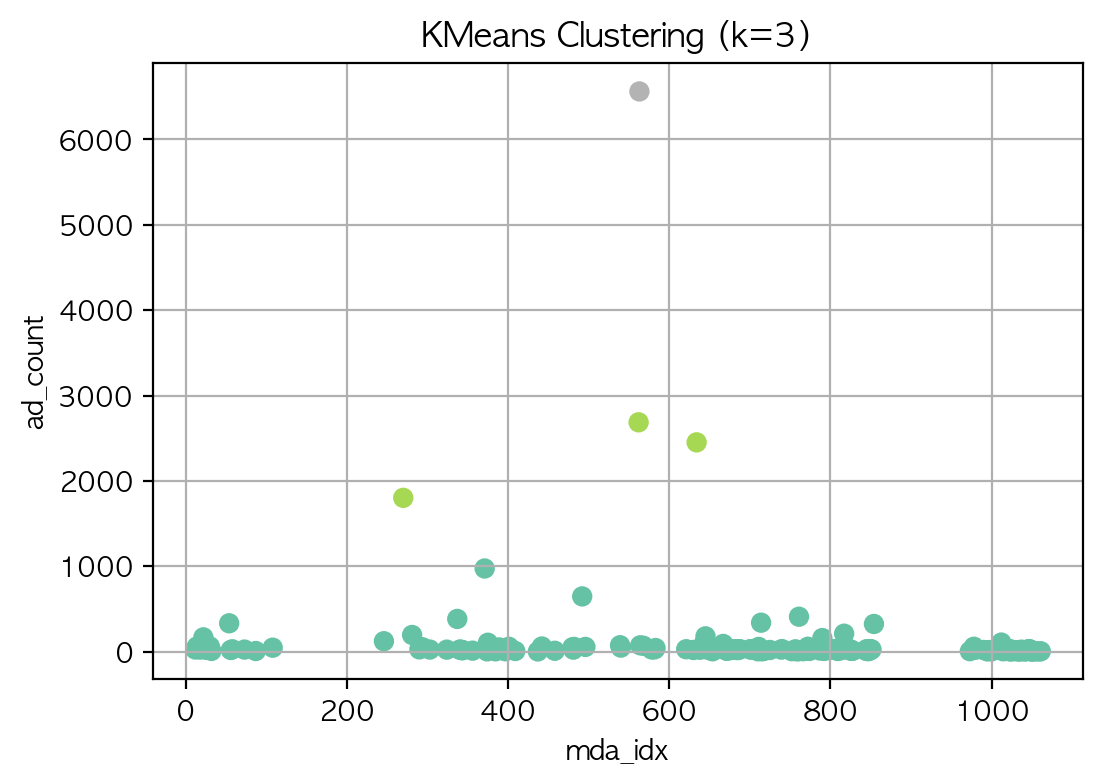

============ k=4 결과 ============
             count       mean      std        min        25%        50%        75%        max
cluster_4                                                                                    
0         178.0000    27.5056  33.4046     1.0000     9.0000    22.0000    27.0000   209.0000
1           3.0000 2,312.6667 458.4303 1,801.0000 2,126.0000 2,451.0000 2,568.5000 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000
3           7.0000   485.8571 242.2694   323.0000   334.5000   382.0000   527.0000   973.0000


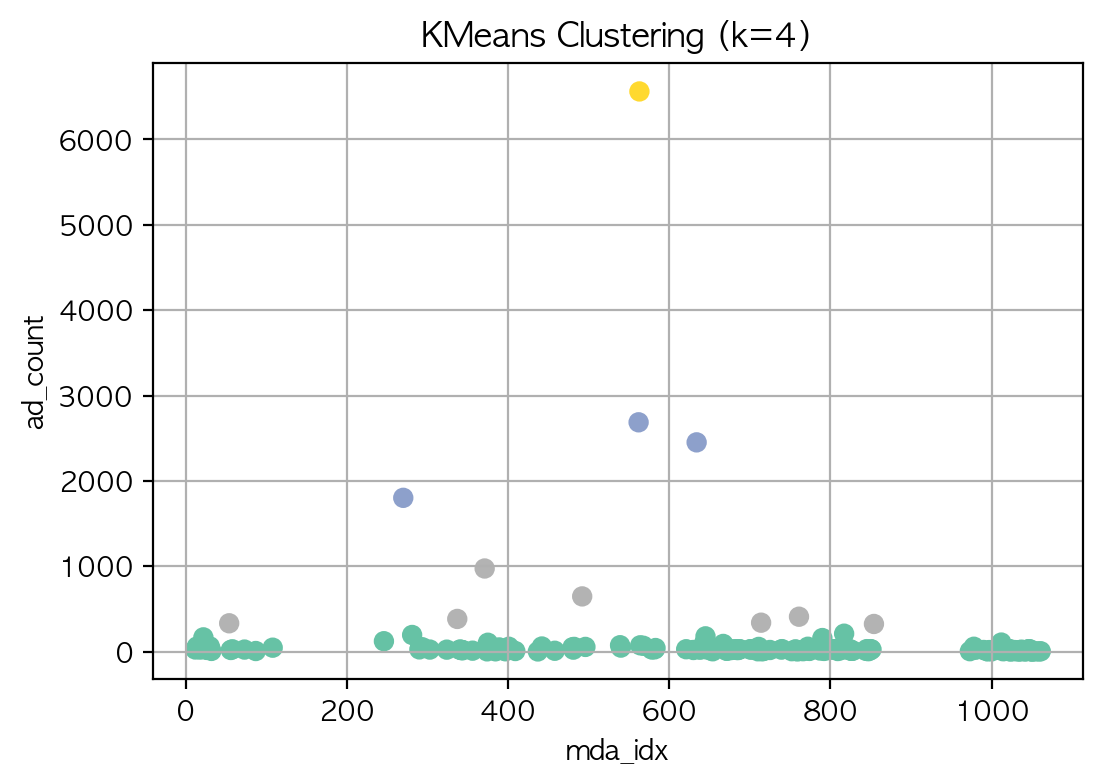

============ k=5 결과 ============
             count       mean      std        min        25%        50%        75%        max
cluster_5                                                                                    
0         178.0000    27.5056  33.4046     1.0000     9.0000    22.0000    27.0000   209.0000
1           2.0000 2,568.5000 166.1701 2,451.0000 2,509.7500 2,568.5000 2,627.2500 2,686.0000
2           1.0000 6,563.0000      NaN 6,563.0000 6,563.0000 6,563.0000 6,563.0000 6,563.0000
3           7.0000   485.8571 242.2694   323.0000   334.5000   382.0000   527.0000   973.0000
4           1.0000 1,801.0000      NaN 1,801.0000 1,801.0000 1,801.0000 1,801.0000 1,801.0000


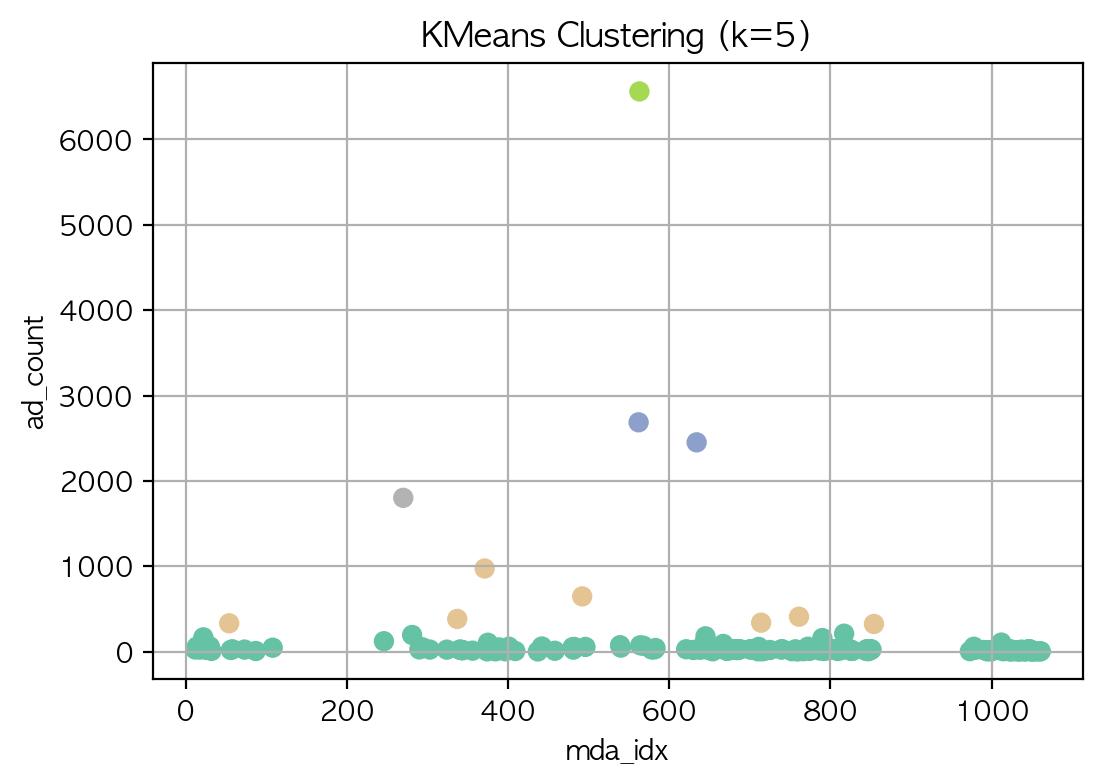

In [49]:
# ad_counts 데이터프레임 있다고 가정
# 숫자형 변수만 추출
X = ad_counts[['ad_count']]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (k=3~5 시도해보기)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    ad_counts[f'cluster_{k}'] = labels
    
    print("="*12, f"k={k} 결과", "="*12)
    print(ad_counts.groupby(f'cluster_{k}')['ad_count'].describe())
    
    # 시각화
    plt.figure(figsize=(6,4))
    plt.scatter(ad_counts['mda_idx'], ad_counts['ad_count'], 
                c=labels, cmap='Set2', s=40)
    plt.xlabel("mda_idx")
    plt.ylabel("ad_count")
    plt.title(f"KMeans Clustering (k={k})")
    plt.grid(True)
    plt.show()


In [50]:
# 1. ads_time 테이블에서 기간 필터링
mask = (ads_time['rpt_time_date'] >= '2025-07-27') & (ads_time['rpt_time_date'] <= '2025-08-25')
ads_time_filtered = ads_time.loc[mask]

# 2. mda_idx별 총 클릭수 집계
clicks_by_mda = ads_time_filtered.groupby('mda_idx')['rpt_time_clk'].sum().reset_index()
clicks_by_mda.rename(columns={'rpt_time_clk': 'total_clicks'}, inplace=True)

# 3. ad_counts에 병합 (mda_idx 기준)
ad_counts = ad_counts.merge(clicks_by_mda, on='mda_idx', how='left')

In [51]:
ad_counts.head()

,mda_idx,ad_count,mda_size,cluster_3,cluster_4,cluster_5,total_clicks
0,563,6563,초대형 운영,2,2,2,520684
1,562,2686,초대형 운영,1,1,1,21018
2,634,2451,초대형 운영,1,1,1,5065
3,270,1801,대규모 운영,1,1,4,61629
4,371,973,대규모 운영,0,3,3,29225


In [52]:
def categorize_clicks(x):
    if x < 1000:
        return '초저활성'
    elif x < 10000:
        return '저활성'
    elif x < 100000:
        return '보통'
    elif x < 1000000:
        return '고활성'
    else:
        return '초고활성'

ad_counts['clk_size'] = ad_counts['total_clicks'].apply(categorize_clicks)

ad_counts.head()

,mda_idx,ad_count,mda_size,cluster_3,cluster_4,cluster_5,total_clicks,clk_size
0,563,6563,초대형 운영,2,2,2,520684,고활성
1,562,2686,초대형 운영,1,1,1,21018,보통
2,634,2451,초대형 운영,1,1,1,5065,저활성
3,270,1801,대규모 운영,1,1,4,61629,보통
4,371,973,대규모 운영,0,3,3,29225,보통


============ k=3 결과 ============
             count            mean          std             min             25%             50%             75%             max
cluster_3                                                                                                                      
0         184.0000      9,817.2500  23,389.0075          1.0000         97.5000      3,537.0000      9,506.2500    180,770.0000
1           1.0000 13,467,994.0000          NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           4.0000    383,240.0000 141,397.8096    224,538.0000    285,135.0000    393,869.0000    491,974.0000    520,684.0000


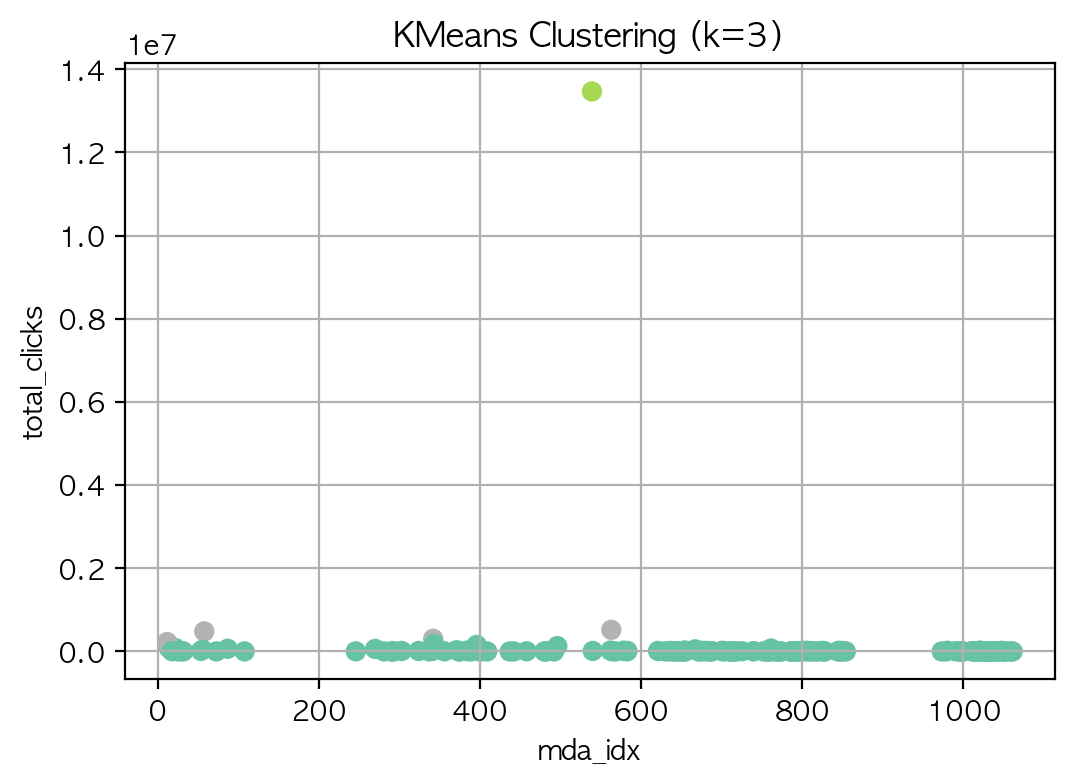

============ k=4 결과 ============
             count            mean         std             min             25%             50%             75%             max
cluster_4                                                                                                                     
0         181.0000      7,406.7790 13,784.5694          1.0000         96.0000      3,415.0000      9,203.0000     84,790.0000
1           1.0000 13,467,994.0000         NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           2.0000    501,544.0000 27,068.0476    482,404.0000    491,974.0000    501,544.0000    511,114.0000    520,684.0000
3           5.0000    199,123.8000 69,111.1387    127,878.0000    157,099.0000    180,770.0000    224,538.0000    305,334.0000


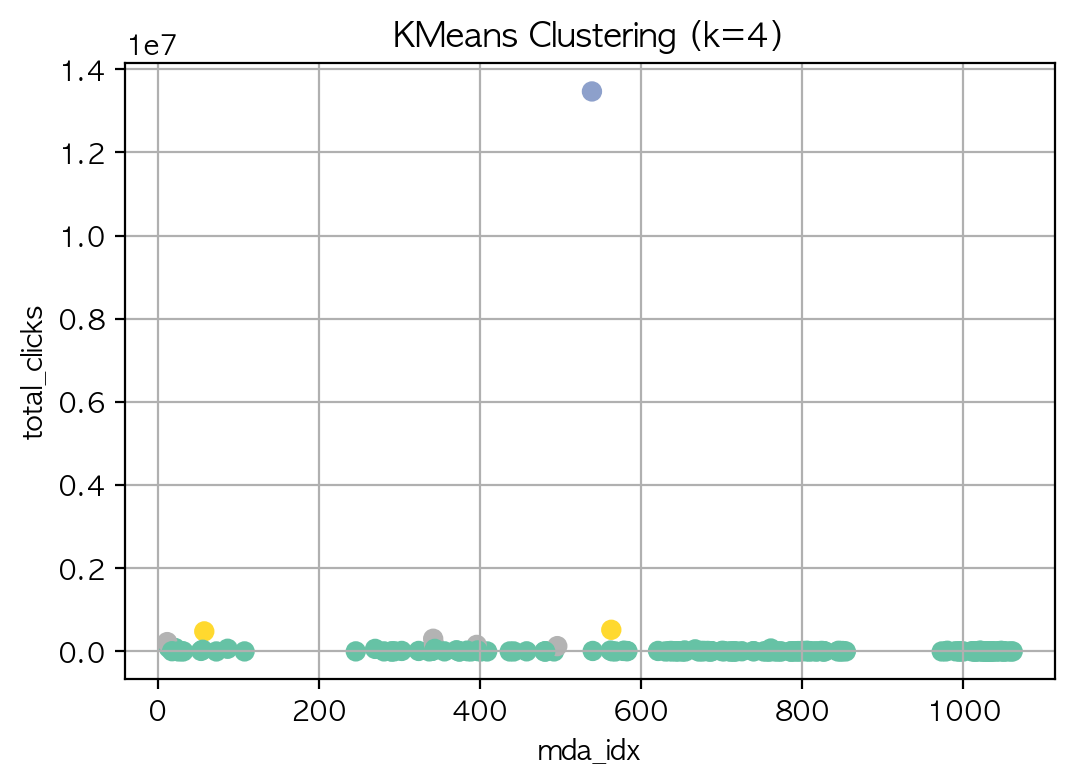

============ k=5 결과 ============
             count            mean         std             min             25%             50%             75%             max
cluster_5                                                                                                                     
0         173.0000      4,776.3295  5,704.2391          1.0000         73.0000      2,966.0000      7,980.0000     29,225.0000
1           1.0000 13,467,994.0000         NaN 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000 13,467,994.0000
2           2.0000    501,544.0000 27,068.0476    482,404.0000    491,974.0000    501,544.0000    511,114.0000    520,684.0000
3           4.0000    216,935.2500 65,218.7165    157,099.0000    174,852.2500    202,654.0000    244,737.0000    305,334.0000
4           9.0000     71,355.5556 25,291.4433     40,368.0000     61,462.0000     64,352.0000     80,977.0000    127,878.0000


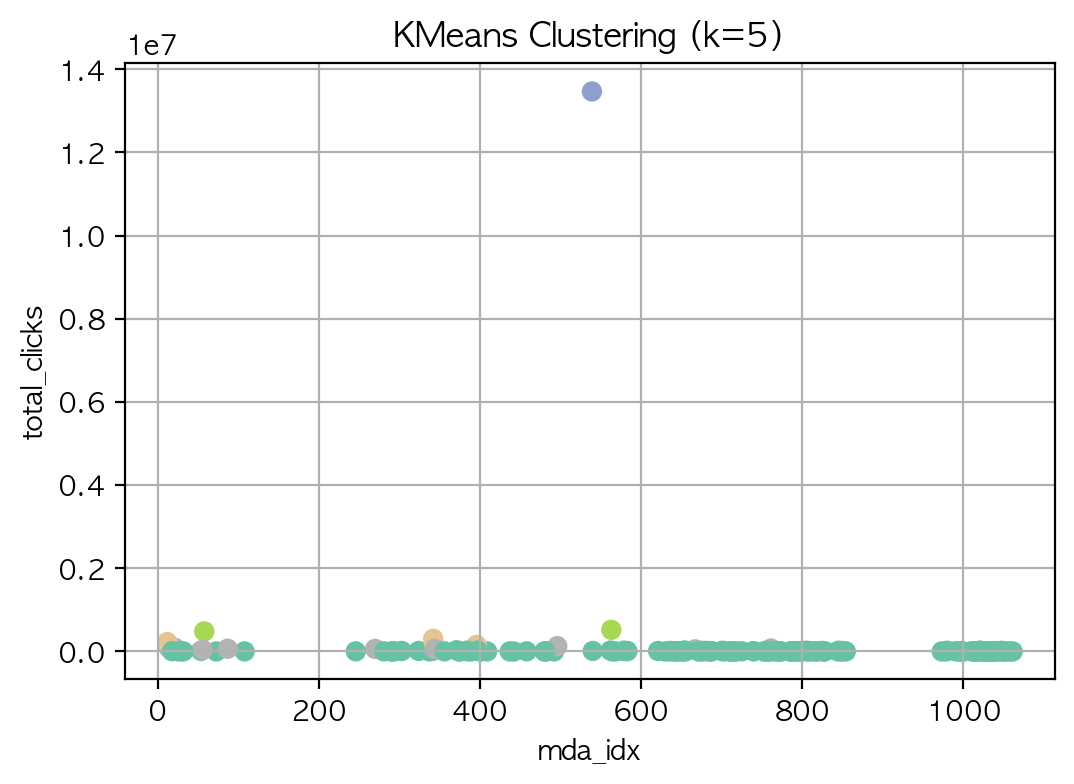

In [53]:
# ad_counts 데이터프레임 있다고 가정
# 숫자형 변수만 추출
X = ad_counts[['total_clicks']]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (k=3~5 시도해보기)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    ad_counts[f'cluster_{k}'] = labels
    
    print("="*12, f"k={k} 결과", "="*12)
    print(ad_counts.groupby(f'cluster_{k}')['total_clicks'].describe())
    
    # 시각화
    plt.figure(figsize=(6,4))
    plt.scatter(ad_counts['mda_idx'], ad_counts['total_clicks'], 
                c=labels, cmap='Set2', s=40)
    plt.xlabel("mda_idx")
    plt.ylabel("total_clicks")
    plt.title(f"KMeans Clustering (k={k})")
    plt.grid(True)
    plt.show()


In [54]:
ad_counts.head()

,mda_idx,ad_count,mda_size,cluster_3,cluster_4,cluster_5,total_clicks,clk_size
0,563,6563,초대형 운영,2,2,2,520684,고활성
1,562,2686,초대형 운영,0,0,0,21018,보통
2,634,2451,초대형 운영,0,0,0,5065,저활성
3,270,1801,대규모 운영,0,0,4,61629,보통
4,371,973,대규모 운영,0,0,0,29225,보통


In [55]:
# 1. 사용할 변수 선택
features = ['ad_count', 'total_clicks', 'mda_size', 'clk_size']

# 2. 수치형/범주형 분리
num_cols = ['ad_count', 'total_clicks']
cat_cols = ['mda_size', 'clk_size']

# 3. 범주형 원핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(ad_counts[cat_cols])
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 4. 결합
X = pd.concat([
    ad_counts[num_cols].reset_index(drop=True),
    pd.DataFrame(encoded, columns=encoded_cols)
], axis=1)

# 5. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. KMeans 실행 (예: k=3,4,5)
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ad_counts[f'cluster_{k}_mix'] = labels
    
    print("="*12, f"k={k} 결과", "="*12)
    print(ad_counts.groupby(f'cluster_{k}_mix')[['ad_count','total_clicks']].mean())


============ k=3 결과 ============
               ad_count    total_clicks
cluster_3_mix                          
0               27.8939      4,951.1212
1               74.0000 13,467,994.0000
2              162.9754     24,693.1148
============ k=4 결과 ============
                ad_count    total_clicks
cluster_4_mix                           
0                27.8939      4,951.1212
1                68.7647     20,720.9496
2             3,900.0000    182,255.6667
3                74.0000 13,467,994.0000
============ k=5 결과 ============
                ad_count    total_clicks
cluster_5_mix                           
0                32.3088        145.7059
1                41.8846     23,360.2821
2               116.9231     24,629.6667
3                74.0000 13,467,994.0000
4             3,900.0000    182,255.6667


In [56]:
# 클러스터 결과와 주요 지표만 보기
cols_to_show = ['mda_idx', 'ad_count', 'total_clicks', 
                'mda_size', 'clk_size',
                'cluster_3_mix', 'cluster_4_mix', 'cluster_5_mix']

display(ad_counts[cols_to_show].head(20))  # 상위 20개 확인


,mda_idx,ad_count,total_clicks,mda_size,clk_size,cluster_3_mix,cluster_4_mix,cluster_5_mix
0,563,6563,520684,초대형 운영,고활성,2,2,4
1,562,2686,21018,초대형 운영,보통,2,2,4
2,634,2451,5065,초대형 운영,저활성,2,2,4
3,270,1801,61629,대규모 운영,보통,2,1,2
4,371,973,29225,대규모 운영,보통,2,1,2
5,492,646,805,대규모 운영,초저활성,0,0,0
6,761,408,70530,대규모 운영,보통,2,1,2
7,337,382,1902,대규모 운영,저활성,2,1,1
8,714,338,1288,대규모 운영,저활성,2,1,1
9,54,331,12744,대규모 운영,보통,2,1,2


In [57]:
# 예: k=4 결과에서 cluster_4_mix == 2 (초대형 그룹) 매체사만 보기
ad_counts.loc[ad_counts['cluster_4_mix'] == 2, 
              ['mda_idx','ad_count','total_clicks','mda_size','clk_size']]


,mda_idx,ad_count,total_clicks,mda_size,clk_size
0,563,6563,520684,초대형 운영,고활성
1,562,2686,21018,초대형 운영,보통
2,634,2451,5065,초대형 운영,저활성


In [58]:
# 각 클러스터에서 ad_count와 total_clicks 기준 상위 5개 매체사 보기
for k in ['cluster_3_mix','cluster_4_mix','cluster_5_mix']:
    print("="*12, k, "="*12)
    for c in ad_counts[k].unique():
        print(f"\n▶ Cluster {c}")
        display(
            ad_counts.loc[ad_counts[k]==c,
                          ['mda_idx','ad_count','total_clicks','mda_size','clk_size']]
            .sort_values('total_clicks', ascending=False)
            .head(5)
        )


============ cluster_3_mix ============

▶ Cluster 2


,mda_idx,ad_count,total_clicks,mda_size,clk_size
0,563,6563,520684,초대형 운영,고활성
74,58,26,482404,소규모 운영,고활성
121,342,17,305334,소규모 운영,고활성
85,12,24,224538,소규모 운영,고활성
123,343,17,180770,소규모 운영,고활성



▶ Cluster 0


,mda_idx,ad_count,total_clicks,mda_size,clk_size
152,396,6,157099,테스트형 매체사,고활성
154,87,6,64352,테스트형 매체사,보통
160,397,4,24249,테스트형 매체사,보통
174,654,3,24056,테스트형 매체사,보통
163,384,4,18867,테스트형 매체사,보통



▶ Cluster 1


,mda_idx,ad_count,total_clicks,mda_size,clk_size
21,539,74,13467994,중간 규모,초고활성


============ cluster_4_mix ============

▶ Cluster 2


,mda_idx,ad_count,total_clicks,mda_size,clk_size
0,563,6563,520684,초대형 운영,고활성
1,562,2686,21018,초대형 운영,보통
2,634,2451,5065,초대형 운영,저활성



▶ Cluster 1


,mda_idx,ad_count,total_clicks,mda_size,clk_size
74,58,26,482404,소규모 운영,고활성
121,342,17,305334,소규모 운영,고활성
85,12,24,224538,소규모 운영,고활성
123,343,17,180770,소규모 운영,고활성
32,496,54,127878,중간 규모,고활성



▶ Cluster 0


,mda_idx,ad_count,total_clicks,mda_size,clk_size
152,396,6,157099,테스트형 매체사,고활성
154,87,6,64352,테스트형 매체사,보통
160,397,4,24249,테스트형 매체사,보통
174,654,3,24056,테스트형 매체사,보통
163,384,4,18867,테스트형 매체사,보통



▶ Cluster 3


,mda_idx,ad_count,total_clicks,mda_size,clk_size
21,539,74,13467994,중간 규모,초고활성


============ cluster_5_mix ============

▶ Cluster 4


,mda_idx,ad_count,total_clicks,mda_size,clk_size
0,563,6563,520684,초대형 운영,고활성
1,562,2686,21018,초대형 운영,보통
2,634,2451,5065,초대형 운영,저활성



▶ Cluster 2


,mda_idx,ad_count,total_clicks,mda_size,clk_size
25,14,59,84790,중간 규모,보통
14,22,166,80977,중간 규모,보통
6,761,408,70530,대규모 운영,보통
154,87,6,64352,테스트형 매체사,보통
3,270,1801,61629,대규모 운영,보통



▶ Cluster 0


,mda_idx,ad_count,total_clicks,mda_size,clk_size
19,643,94,963,중간 규모,초저활성
36,389,48,871,소규모 운영,초저활성
39,108,45,813,소규모 운영,초저활성
5,492,646,805,대규모 운영,초저활성
42,651,31,765,소규모 운영,초저활성



▶ Cluster 1


,mda_idx,ad_count,total_clicks,mda_size,clk_size
74,58,26,482404,소규모 운영,고활성
121,342,17,305334,소규모 운영,고활성
85,12,24,224538,소규모 운영,고활성
123,343,17,180770,소규모 운영,고활성
152,396,6,157099,테스트형 매체사,고활성



▶ Cluster 3


,mda_idx,ad_count,total_clicks,mda_size,clk_size
21,539,74,13467994,중간 규모,초고활성


In [59]:
# 주요 컬럼 + 클러스터 결과 전부 보기
cols_to_show = [
    'mda_idx', 'ad_count', 'total_clicks', 
    'mda_size', 'clk_size',
    'cluster_3_mix', 'cluster_4_mix', 'cluster_5_mix'
]

# 전체 출력 (행이 많으면 Jupyter에서는 스크롤로 보일 수 있음)
display(ad_counts[cols_to_show])

# 행이 많아 잘리는 경우 → CSV로 저장 후 확인
ad_counts[cols_to_show].to_csv("mda_cluster_result.csv", encoding="utf-8-sig", index=False)


,mda_idx,ad_count,total_clicks,mda_size,clk_size,cluster_3_mix,cluster_4_mix,cluster_5_mix
0,563,6563,520684,초대형 운영,고활성,2,2,4
1,562,2686,21018,초대형 운영,보통,2,2,4
2,634,2451,5065,초대형 운영,저활성,2,2,4
3,270,1801,61629,대규모 운영,보통,2,1,2
4,371,973,29225,대규모 운영,보통,2,1,2
5,492,646,805,대규모 운영,초저활성,0,0,0
6,761,408,70530,대규모 운영,보통,2,1,2
7,337,382,1902,대규모 운영,저활성,2,1,1
8,714,338,1288,대규모 운영,저활성,2,1,1
9,54,331,12744,대규모 운영,보통,2,1,2


In [60]:
ad_counts['cluster_3_mix'].value_counts()

cluster_3_mix
2    122
0     66
1      1
Name: count, dtype: int64

In [61]:
ad_counts['cluster_4_mix'].value_counts()

cluster_4_mix
1    119
0     66
2      3
3      1
Name: count, dtype: int64

In [62]:
ad_counts['cluster_5_mix'].value_counts()

cluster_5_mix
1    78
0    68
2    39
4     3
3     1
Name: count, dtype: int64

In [63]:
# # ads_list : 광고 단위 데이터 (ads_idx, mda_idx 포함)
# avg_ads = ads_list.groupby('mda_idx')['ads_idx'].count().mean()
# print("매체사별 평균 광고 수 :", avg_ads)


In [64]:
ad_counts.head()

,mda_idx,ad_count,mda_size,cluster_3,cluster_4,cluster_5,total_clicks,clk_size,cluster_3_mix,cluster_4_mix,cluster_5_mix
0,563,6563,초대형 운영,2,2,2,520684,고활성,2,2,4
1,562,2686,초대형 운영,0,0,0,21018,보통,2,2,4
2,634,2451,초대형 운영,0,0,0,5065,저활성,2,2,4
3,270,1801,대규모 운영,0,0,4,61629,보통,2,1,2
4,371,973,대규모 운영,0,0,0,29225,보통,2,1,2


In [65]:
ad_counts.drop(columns=['cluster_3', 'cluster_4', 'cluster_5'], inplace=True)

In [66]:
ad_counts.head()

,mda_idx,ad_count,mda_size,total_clicks,clk_size,cluster_3_mix,cluster_4_mix,cluster_5_mix
0,563,6563,초대형 운영,520684,고활성,2,2,4
1,562,2686,초대형 운영,21018,보통,2,2,4
2,634,2451,초대형 운영,5065,저활성,2,2,4
3,270,1801,대규모 운영,61629,보통,2,1,2
4,371,973,대규모 운영,29225,보통,2,1,2


In [67]:
# --- 0) 라이브러리
import numpy as np
import pandas as pd

from typing import Dict, List, Optional, Tuple
from dataclasses import dataclass

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


# --- 1) 설정(바꿔 쓰기)
@dataclass
class ClusterConfig:
    segment_col: str = "mda_size"        # 세그먼트 컬럼
    id_col: str = "mda_idx"              # 매체사 ID
    k_candidates: Tuple[int, ...] = (3,4,5,6)
    min_rows_for_clustering: int = 20    # 이보다 작으면 1클러스터로 처리
    pca_time_n: int = 2                  # 요일/시간 패턴을 PCA 몇 축으로 축소할지(0이면 사용 안함)
    log1p_cols: Tuple[str, ...] = ("total_clicks", "ad_count")  # 로그 변환 대상
    numeric_cols_base: Tuple[str, ...] = ("total_clicks","ad_count") # 기본 피처
    add_ratio_cols: bool = True          # total_clicks/ad_count 같은 비율 피처 추가
    dropna_fill: str = "median"          # 결측치 대치: 'median' 또는 'zero'


cfg = ClusterConfig()


# --- 2) 유틸: 피처 열 자동 탐색(요일/시간 패턴, 품질지표 등 이름 규칙)
def find_columns(df: pd.DataFrame) -> Dict[str, List[str]]:
    cols = df.columns.tolist()
    time_cols = [c for c in cols if c.startswith("weekday_name_eff_") or c.startswith("daypart_eff_")]
    quality_cols = [c for c in cols if any(key in c.lower() for key in ["cvr","epc","r_hat","volatility","ctit","dup","entropy","topcat_share","cat_entropy"])]
    # 숫자형만 골라냄
    num_like = df.select_dtypes(include=[np.number]).columns.tolist()
    return {
        "time": [c for c in time_cols if c in num_like],
        "quality": [c for c in quality_cols if c in num_like],
        "numeric": [c for c in num_like if c not in [cfg.id_col] ]
    }


# --- 3) 피처 빌드(로그/비율/PCA/스케일링)
def build_features(df: pd.DataFrame, cfg: ClusterConfig) -> Tuple[pd.DataFrame, List[str]]:
    cols_info = find_columns(df)

    # 기본 + 품질지표 포함
    feat_cols = list(cfg.numeric_cols_base)
    for c in cols_info["quality"]:
        if c not in feat_cols:
            feat_cols.append(c)

    # 비율 피처
    if cfg.add_ratio_cols and all(c in df.columns for c in ("total_clicks","ad_count")):
        df = df.copy()
        df["clicks_per_ad"] = (df["total_clicks"].astype(float) / df["ad_count"].replace(0, np.nan)).replace([np.inf, -np.inf], np.nan)
        feat_cols.append("clicks_per_ad")

    # 존재하는 컬럼만 사용
    feat_cols = [c for c in feat_cols if c in df.columns]

    # 결측 대치
    X = df[feat_cols].copy()
    if cfg.dropna_fill == "median":
        X = X.fillna(X.median(numeric_only=True))
    else:
        X = X.fillna(0)

    # 로그 변환
    for c in cfg.log1p_cols:
        if c in X.columns:
            X[c] = np.log1p(X[c].clip(lower=0))

    # 시간/요일 패턴 → PCA 축소(옵션)
    pca_feats = pd.DataFrame(index=df.index)
    if cfg.pca_time_n and cfg.pca_time_n > 0 and len(cols_info["time"]) > 0:
        T = df[cols_info["time"]].fillna(0)
        # row-normalize (합=1) – 전반적 크기 영향 제거
        row_sum = T.sum(axis=1).replace(0, 1)
        T_norm = T.div(row_sum, axis=0)
        pca = PCA(n_components=min(cfg.pca_time_n, T_norm.shape[1]))
        T_p = pca.fit_transform(T_norm.values)
        for i in range(T_p.shape[1]):
            pca_feats[f"time_pca_{i+1}"] = T_p[:, i]

    # 합치기
    X_full = pd.concat([X, pca_feats], axis=1)

    # 스케일링
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_full.values), columns=X_full.columns, index=X_full.index)

    return X_scaled, X_scaled.columns.tolist()


# --- 4) k 자동 선택(KMeans + 실루엣 우선, 보조지표로 CH/DBI)
def choose_k(X: pd.DataFrame, k_candidates: Tuple[int, ...]) -> int:
    best_k, best_sil = None, -1
    # 샘플 수가 너무 작으면 그냥 1
    if X.shape[0] < min(k_candidates):
        return 1
    for k in k_candidates:
        if k >= X.shape[0]:  # k는 샘플 수 미만이어야 함
            continue
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = km.fit_predict(X)
        # 모든 라벨이 동일하면 silhouette 불가
        if len(set(labels)) == 1:
            continue
        try:
            sil = silhouette_score(X, labels, metric="euclidean")
        except Exception:
            sil = -1
        # 보조 판단(비슷하면 CH↑, DBI↓ 고려)
        if sil > best_sil:
            best_sil = sil
            best_k = k

    if best_k is None:
        return 1
    return best_k


# --- 5) 세그먼트(예: mda_size)별 클러스터링
def segmentwise_clustering(ad_counts: pd.DataFrame, cfg: ClusterConfig = cfg) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    반환:
      - df_out: 원본 + cluster_id(세그먼트별 라벨) + k_used
      - prof: 클러스터 프로파일(중앙값 요약)
    """
    assert cfg.segment_col in ad_counts.columns, f"세그먼트 컬럼({cfg.segment_col})이 없습니다."
    df = ad_counts.copy()
    df_out_list = []
    prof_list = []

    for seg, sub in df.groupby(cfg.segment_col):
        sub = sub.copy().reset_index(drop=True)

        # 최소 행 미만이면 전부 하나의 클러스터로
        if len(sub) < cfg.min_rows_for_clustering:
            sub["cluster_local"] = 0
            sub["k_used"] = 1
        else:
            X_scaled, feat_cols = build_features(sub, cfg)
            k_opt = choose_k(X_scaled, cfg.k_candidates)
            if k_opt <= 1:
                sub["cluster_local"] = 0
                sub["k_used"] = 1
            else:
                km = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
                sub["cluster_local"] = km.fit_predict(X_scaled)
                sub["k_used"] = k_opt

        # 사람이 읽기 좋은 글로벌 라벨
        sub["cluster_id"] = sub[cfg.segment_col].astype(str) + "_c" + sub["cluster_local"].astype(str)
        df_out_list.append(sub)

        # 프로파일 요약(중앙값)
        num_cols = sub.select_dtypes(include=[np.number]).columns.tolist()
        # 너무 기술지표가 많으면 핵심만
        keep_cols = [c for c in ["total_clicks","ad_count","clicks_per_ad","CVR","EPC","volatility","cat_entropy","topcat_share"] if c in sub.columns]
        if not keep_cols:
            keep_cols = num_cols
        prof = sub.groupby("cluster_id")[keep_cols].median(numeric_only=True)
        prof["size"] = sub.groupby("cluster_id").size()
        prof["segment"] = seg
        prof_list.append(prof.reset_index())

    df_out = pd.concat(df_out_list, axis=0, ignore_index=True)
    prof = pd.concat(prof_list, axis=0, ignore_index=True)

    # 정렬
    df_out = df_out.sort_values([cfg.segment_col, "cluster_local"]).reset_index(drop=True)
    prof = prof.sort_values(["segment", "cluster_id"]).reset_index(drop=True)
    return df_out, prof


# --- 6) (선택) 클러스터 기반 가중치 테이블 생성 예시
def make_cluster_weights(profile_df: pd.DataFrame) -> pd.DataFrame:
    """
    예시 규칙:
      - EPC가 높을수록 weight_up
      - volatility(변동성)이 높으면 패널티
      - clicks_per_ad 높으면 소폭 가산
      weight = 1.0 + a*rank_norm(EPC) + b*rank_norm(clicks_per_ad) - c*rank_norm(volatility)
    """
    prof = profile_df.copy()
    def rank_norm(s):
        r = s.rank(method="average", pct=True)
        return (r - r.min()) / (r.max() - r.min() + 1e-9)

    a, b, c = 0.6, 0.2, 0.4
    for col in ["EPC","clicks_per_ad","volatility"]:
        if col not in prof.columns:
            prof[col] = prof[col] if col in prof.columns else 0.0

    prof["w_cluster"] = 1.0 \
                        + a * rank_norm(prof["EPC"]) \
                        + b * rank_norm(prof["clicks_per_ad"]) \
                        - c * rank_norm(prof["volatility"].replace({0: np.nan}).fillna(prof["volatility"].median() if "volatility" in prof else 0))
    # 하한/상한 클리핑
    prof["w_cluster"] = prof["w_cluster"].clip(0.5, 1.8)
    return prof[["cluster_id","segment","w_cluster","EPC","clicks_per_ad","volatility","size"]]


# --- 7) 사용 예시
# df = ad_counts  # 사용자의 데이터프레임
# df_clustered, prof = segmentwise_clustering(df, cfg)
# wtable = make_cluster_weights(prof)

# df_clustered에는 각 매체사별 'cluster_id', 'k_used'가 추가됩니다.
# prof에는 클러스터별 중앙값 요약이 들어 있습니다.
# wtable은 (예시 규칙으로 만든) 클러스터 가중치 테이블입니다.



In [68]:
df = ad_counts  # 사용자의 데이터프레임
df_clustered, prof = segmentwise_clustering(df, cfg)
wtable = make_cluster_weights(prof)


In [69]:
wtable

,cluster_id,segment,w_cluster,EPC,clicks_per_ad,volatility,size
0,대규모 운영_c0,대규모 운영,1.0000,0.0000,0.0000,0.0000,9
1,소규모 운영_c0,소규모 운영,1.0000,0.0000,0.0000,0.0000,51
2,소규모 운영_c1,소규모 운영,1.0000,0.0000,0.0000,0.0000,4
3,소규모 운영_c2,소규모 운영,1.0000,0.0000,0.0000,0.0000,10
4,소규모 운영_c3,소규모 운영,1.0000,0.0000,0.0000,0.0000,23
5,소규모 운영_c4,소규모 운영,1.0000,0.0000,0.0000,0.0000,5
6,소규모 운영_c5,소규모 운영,1.0000,0.0000,0.0000,0.0000,7
7,중간 규모_c0,중간 규모,1.0000,0.0000,0.0000,0.0000,3
8,중간 규모_c1,중간 규모,1.0000,0.0000,0.0000,0.0000,7
9,중간 규모_c2,중간 규모,1.0000,0.0000,0.0000,0.0000,4


In [70]:
# ad_reward: 광고적립 테이블 (컬럼: mda_idx, earn_cost 등)
mda_revenue = (
    ads_rwd
    .groupby("mda_idx")
    .agg(total_revenue=("earn_cost", "sum"))
    .reset_index()
)

mda_revenue


,mda_idx,total_revenue
0,12,13176540
1,14,7200810
2,18,534650
3,22,6063430
4,26,14480
5,30,78070
6,32,490200
7,54,791559
8,56,2580130
9,58,31171690


In [71]:
# time_report: 시간별 적립 테이블 (컬럼: mda_idx, rpt_time_earn 등)
mda_revenue_daily = (
    ads_time
    .groupby("mda_idx")
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .reset_index()
)

mda_revenue_daily


,mda_idx,total_revenue
0,12,13743540
1,14,8521880
2,18,812450
3,22,6477905
4,26,19880
5,30,80250
6,32,502900
7,54,805097
8,56,2606600
9,58,37149770


In [72]:
# 날짜 컬럼 datetime 변환
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# '년-월' 단위 컬럼 추가
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 매체사 × 월별 수익 합계
mda_revenue_monthly = (
    ads_timee
    .groupby(["mda_idx", "year_month"])
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .reset_index()
    .sort_values(["mda_idx", "year_month"])
)

print(mda_revenue_monthly.head())


   mda_idx year_month  total_revenue
0       12    2024-07        3777660
1       12    2024-08       10421190
2       12    2024-09       10761420
3       12    2024-10       13063780
4       12    2024-11        9522490


In [73]:
ads_timee.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type,year_month
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말,2024-07
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말,2024-07
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말,2024-07
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말,2024-07
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말,2024-07


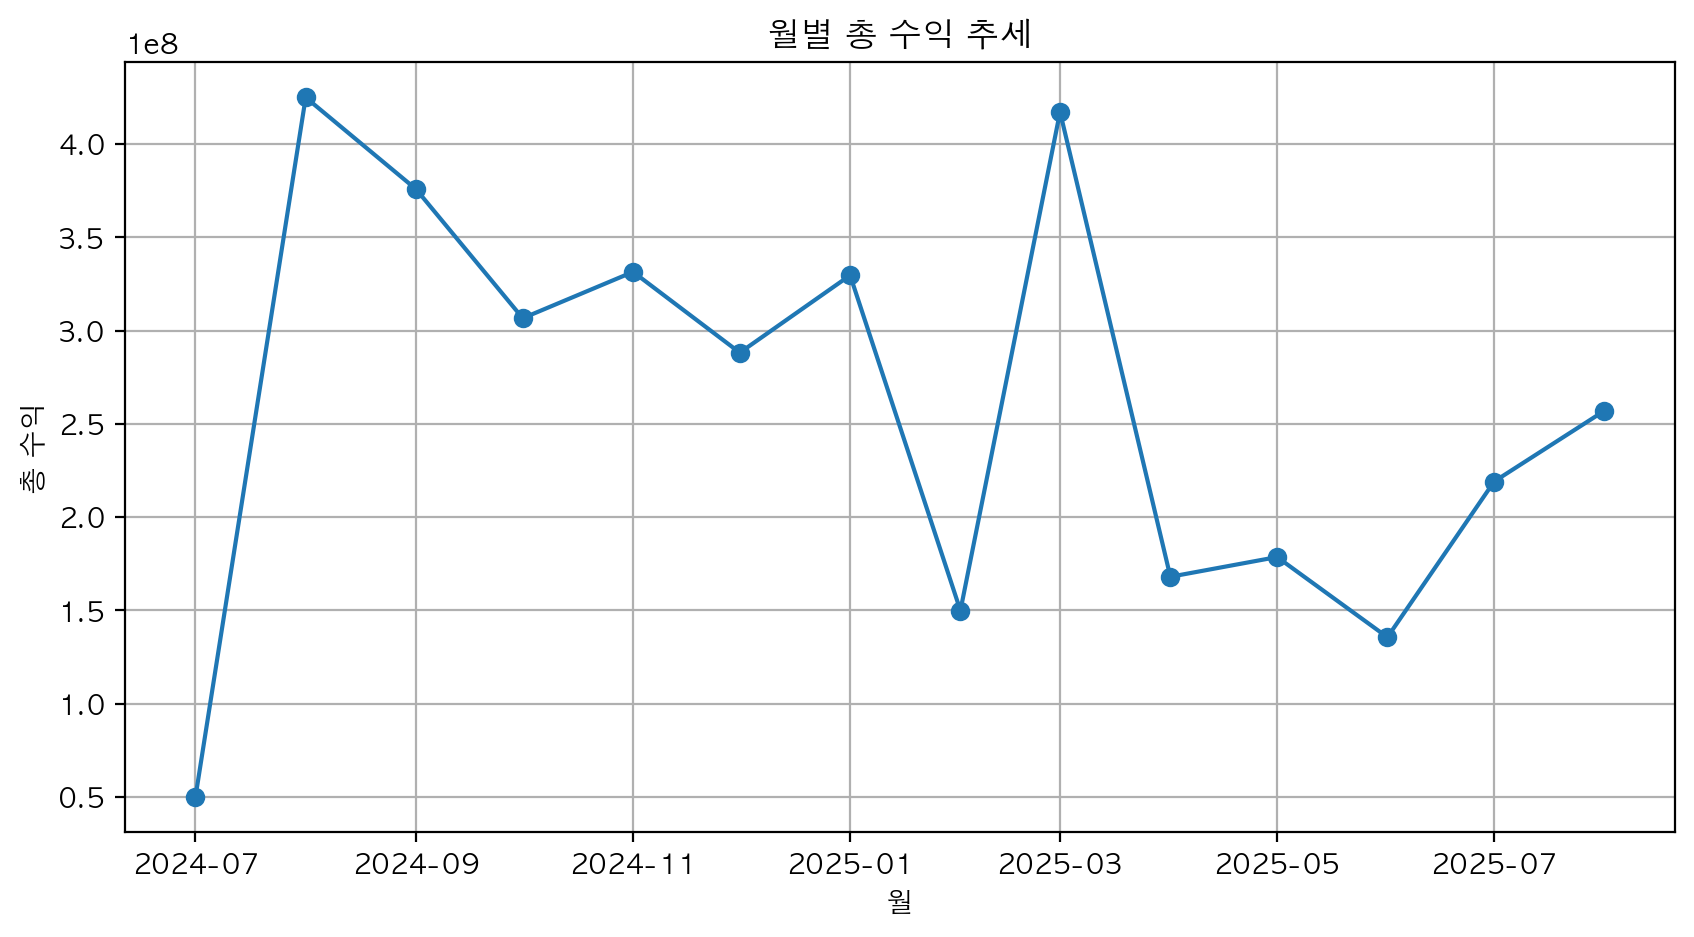

In [74]:
# 날짜 변환
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 월 단위 추출
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 전체 매체사 합산 월별 수익
monthly_total = (
    ads_timee.groupby("year_month")["rpt_time_earn"]
    .sum()
    .reset_index()
)

# Period → Timestamp 변환 (그래프 축용)
monthly_total["year_month"] = monthly_total["year_month"].dt.to_timestamp()

# 그래프
plt.figure(figsize=(10,5))
plt.plot(monthly_total["year_month"], monthly_total["rpt_time_earn"], marker="o")
plt.title("월별 총 수익 추세")
plt.xlabel("월")
plt.ylabel("총 수익")
plt.grid(True)
plt.show()


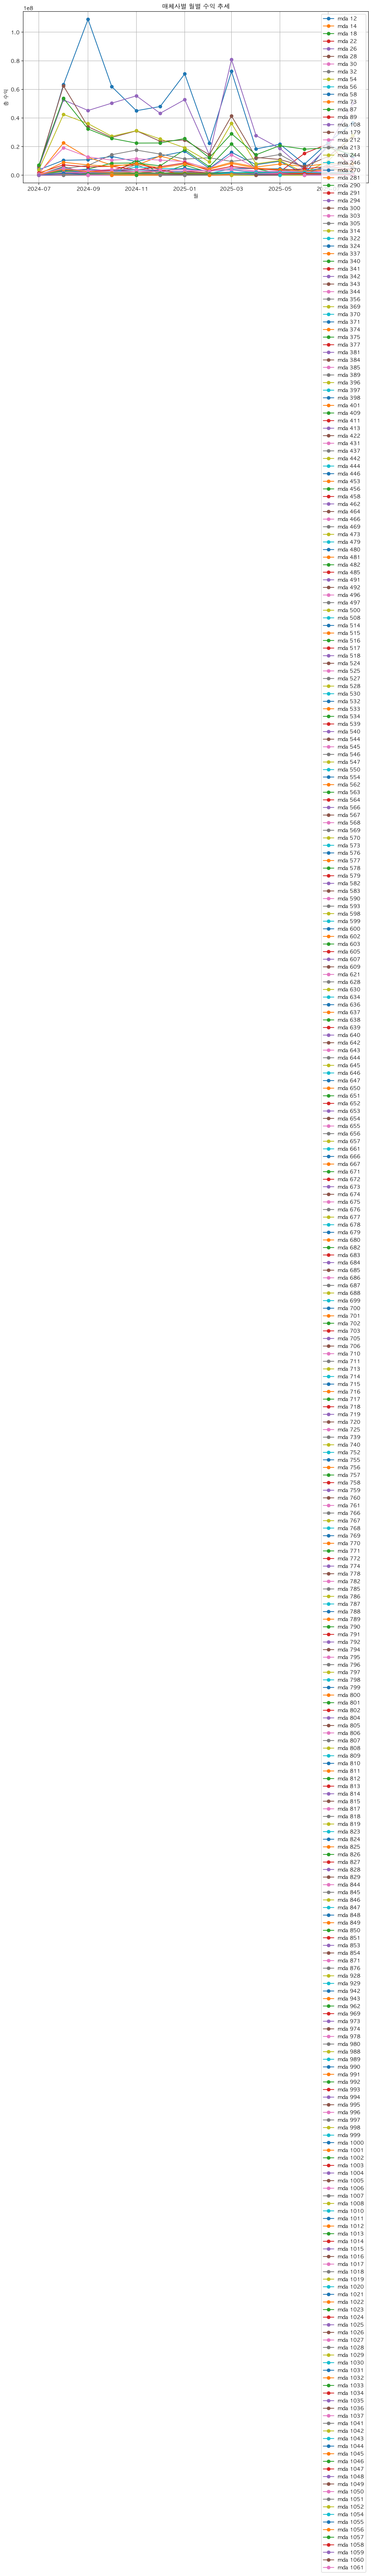

In [75]:
plt.figure(figsize=(12,6))

for mda, sub in mda_revenue_monthly.groupby("mda_idx"):
    plt.plot(sub["year_month"].dt.to_timestamp(),
             sub["total_revenue"],
             marker="o", label=f"mda {mda}")

plt.title("매체사별 월별 수익 추세")
plt.xlabel("월")
plt.ylabel("총 수익")
plt.legend()
plt.grid(True)
plt.show()


In [76]:
ad_counts.head()

,mda_idx,ad_count,mda_size,total_clicks,clk_size,cluster_3_mix,cluster_4_mix,cluster_5_mix
0,563,6563,초대형 운영,520684,고활성,2,2,4
1,562,2686,초대형 운영,21018,보통,2,2,4
2,634,2451,초대형 운영,5065,저활성,2,2,4
3,270,1801,대규모 운영,61629,보통,2,1,2
4,371,973,대규모 운영,29225,보통,2,1,2


In [77]:
ads_timee.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type,year_month
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말,2024-07
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말,2024-07
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말,2024-07
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말,2024-07
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말,2024-07


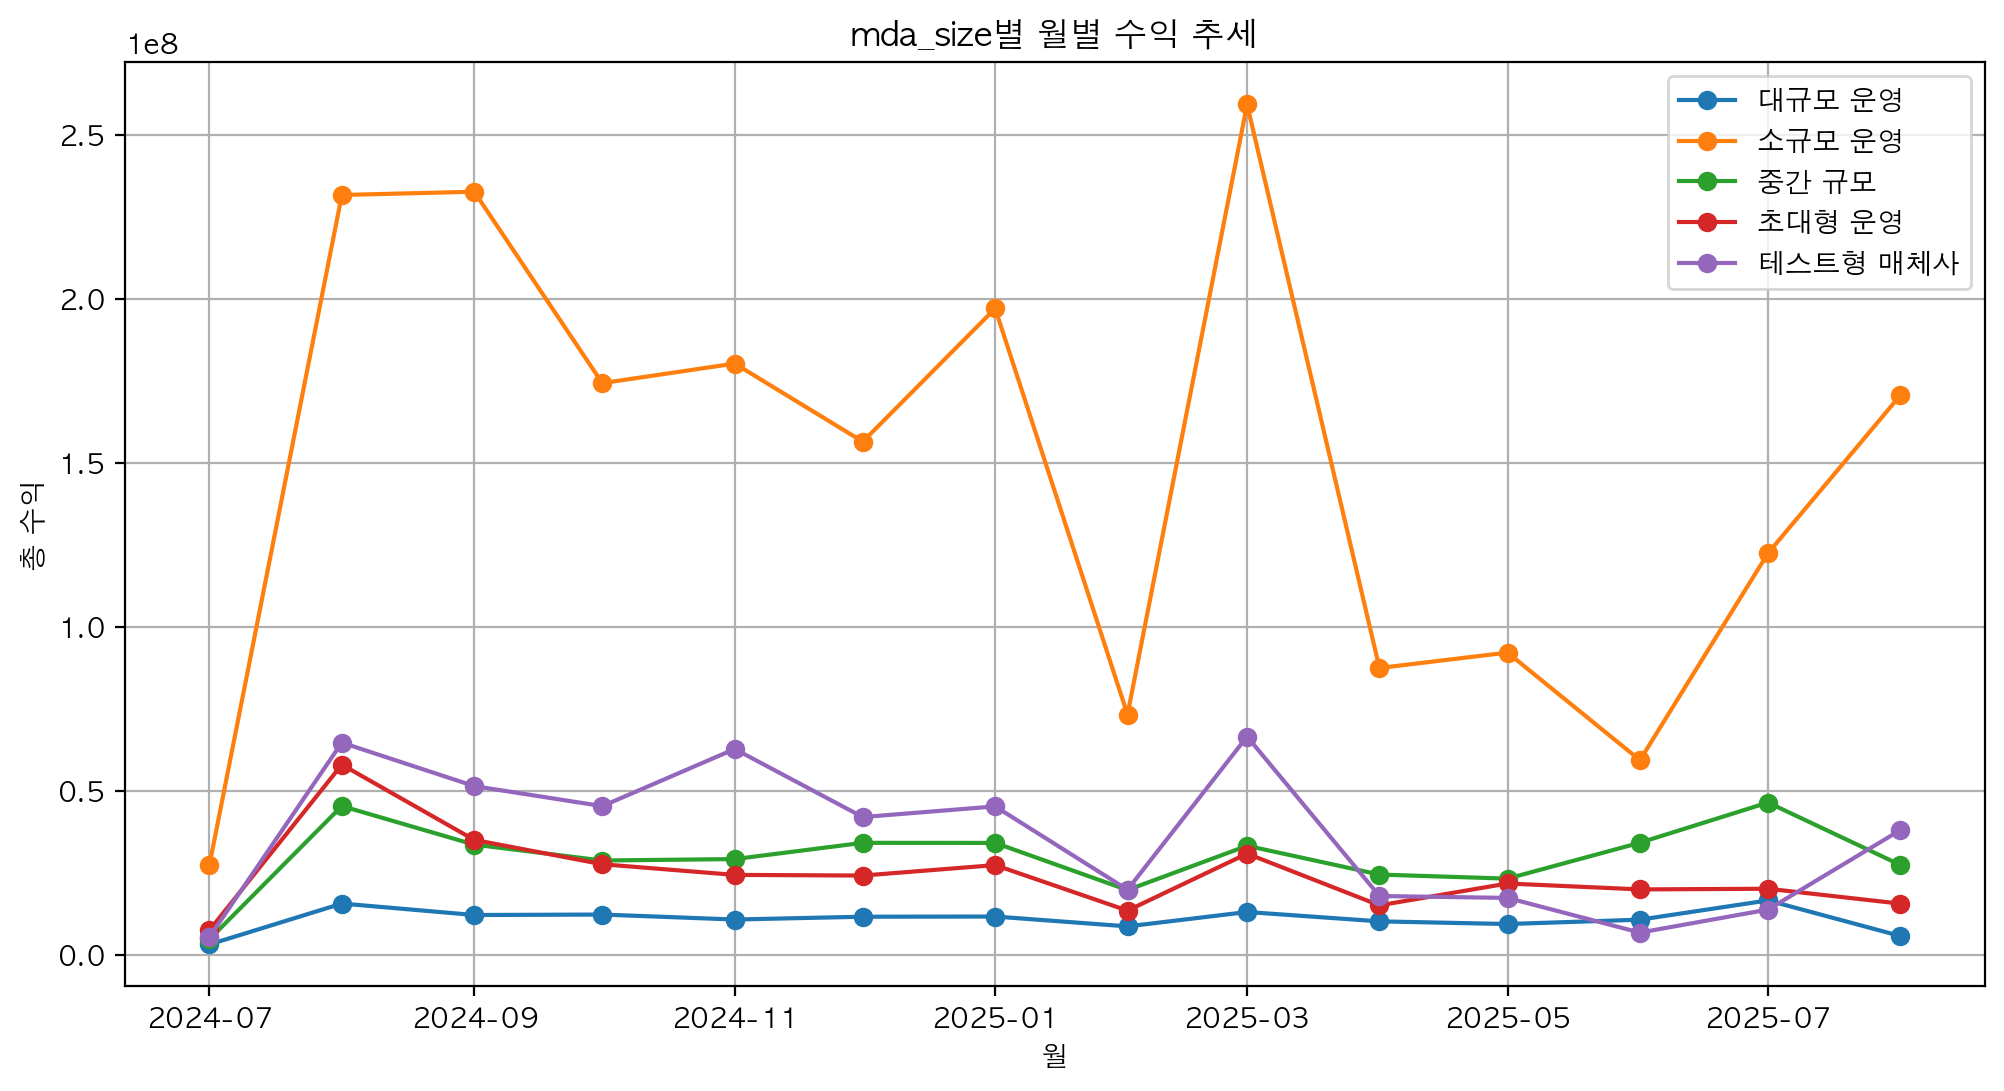

In [78]:
# 0) 컬럼/키 정리
ads_timee.columns = ads_timee.columns.str.strip()
ad_counts.columns = ad_counts.columns.str.strip()

ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)

# 1) 날짜 → 월(Period) 컬럼 생성
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 2) (mda_idx, year_month)별 월 수익 집계
monthly_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(rpt_time_earn=("rpt_time_earn", "sum"))
)

# 3) ad_counts에서 mda_size만 추출(중복 제거) 후 머지
mda_sizes = ad_counts.loc[:, ["mda_idx", "mda_size"]].drop_duplicates(subset=["mda_idx"])
monthly_joined = monthly_by_mda.merge(mda_sizes, on="mda_idx", how="left", validate="m:1")

# 4) mda_size 단위 월별 총수익
mda_size_monthly = (
    monthly_joined.groupby(["mda_size", "year_month"], as_index=False)
                  .agg(total_revenue=("rpt_time_earn", "sum"))
                  .sort_values(["mda_size", "year_month"])
)

# 5) (선택) 피벗 테이블: 행=월, 열=mda_size, 값=총수익
mda_size_monthly_pivot = mda_size_monthly.pivot_table(
    index="year_month", columns="mda_size", values="total_revenue", fill_value=0
).sort_index()

# 6) (선택) 그래프: mda_size별 월별 수익 추세
mda_size_monthly_plot = mda_size_monthly.copy()
mda_size_monthly_plot["year_month"] = mda_size_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["total_revenue"], marker="o", label=str(seg))
plt.title("mda_size별 월별 수익 추세")
plt.xlabel("월")
plt.ylabel("총 수익")
plt.legend()
plt.grid(True)
plt.show()

# 결과 DF들:
# - monthly_joined: mda_idx x month x 수익 + mda_size
# - mda_size_monthly: mda_size x month 총수익
# - mda_size_monthly_pivot: 월별 x mda_size 매트릭스


In [79]:
ad_counts.value_counts()

mda_idx  ad_count  mda_size  total_clicks  clk_size  cluster_3_mix  cluster_4_mix  cluster_5_mix
1000     2         테스트형 매체사  36            초저활성      0              0              0                1
718      9         테스트형 매체사  1570          저활성       0              0              1                1
700      26        소규모 운영    7904          저활성       2              1              1                1
701      25        소규모 운영    15439         보통        2              1              2                1
702      26        소규모 운영    7357          저활성       2              1              1                1
703      26        소규모 운영    4552          저활성       2              1              1                1
710      3         테스트형 매체사  3             초저활성      0              0              0                1
711      54        중간 규모     121           초저활성      0              0              0                1
714      338       대규모 운영    1288          저활성       2              1              1   

In [80]:
print(ad_counts["mda_size"].value_counts())

mda_size
소규모 운영      100
테스트형 매체사     55
중간 규모        22
대규모 운영        9
초대형 운영        3
Name: count, dtype: int64


In [81]:
# ads_list: 광고 목록 (컬럼: ads_idx, mda_idx 등)

# 매체사별 광고 개수 집계
ads_per_mda = (
    ads_info.groupby("mda_idx")
    .agg(ad_count=("ads_idx", "nunique"))  # 고유 광고 개수
    .reset_index()
)

print(ads_per_mda.head())

# 전체 매체사 수
print("매체사 수:", ads_per_mda["mda_idx"].nunique())

# 광고 수 요약 통계
ads_per_mda["ad_count"].describe()


   mda_idx  ad_count
0       12        24
1       14        59
2       18        23
3       22       166
4       26        19
매체사 수: 189


count     189.0000
mean      115.3333
std       561.9177
min         1.0000
25%         9.0000
50%        23.0000
75%        28.0000
max     6,563.0000
Name: ad_count, dtype: float64

In [82]:
# 특정 mda_idx = 539 의 광고 개수
ads_539 = ads_info[ads_info["mda_idx"] == 539]

ad_count_539 = ads_539["ads_idx"].nunique()
print("매체사 539의 광고 수:", ad_count_539)


매체사 539의 광고 수: 74


In [83]:
ads_539_revenue_time = (
    ads_timee[ads_timee["mda_idx"] == '539']
    .groupby("ads_idx", as_index=False)
    .agg(total_revenue=("rpt_time_earn", "sum"))
    .sort_values("total_revenue", ascending=False)
)

print(ads_539_revenue_time.head())


     ads_idx  total_revenue
27     29585        4969200
77    111143        3261900
62     96524        2751000
50     86708        2249170
109   131233        2165400


In [84]:
ads_timee.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_scost,rpt_time_acost,rpt_time_cost,rpt_time_earn,weekday,week_type,year_month
0,2024-07-27,0,4418,761,1,0,0,0,0,0,5,주말,2024-07
1,2024-07-27,0,7377,213,1,0,0,0,0,0,5,주말,2024-07
2,2024-07-27,0,7377,337,1,0,0,0,0,0,5,주말,2024-07
3,2024-07-27,0,7377,496,1,1,230,230,180,180,5,주말,2024-07
4,2024-07-27,0,7528,792,1,0,0,0,0,0,5,주말,2024-07


In [85]:
ad_539_351170 = (
    ads_timee[
        (ads_timee["mda_idx"] == 539) & (ads_timee["ads_idx"] == 351170)
    ]
    .agg(
        total_revenue=("rpt_time_earn", "sum"),
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum")
    )
)

# 전환율 (turns / clicks)
ad_539_351170["CVR"] = (
    ad_539_351170["total_turns"] / ad_539_351170["total_clicks"]
    if ad_539_351170["total_clicks"] > 0 else 0
)

print(ad_539_351170)


KeyError: 'total_clicks'

In [ ]:
# 1) 컬럼/타입 정리
ads_timee = ads_timee.copy()
ads_timee.columns = ads_timee.columns.str.strip()

# 문자열 비교로 안전하게 필터
ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)

mda_target = "539"
ads_target = "443941"

f = ads_timee[(ads_timee["mda_idx"] == mda_target) & (ads_timee["ads_idx"] == ads_target)]

# 2) 컬럼 후보 설정 (있는 것만 사용)
revenue_col = "rpt_time_earn" if "rpt_time_earn" in f.columns else ("earn_cost" if "earn_cost" in f.columns else None)
clicks_col  = "rpt_time_clk"  if "rpt_time_clk"  in f.columns else ("clicks"    if "clicks"    in f.columns else None)
turns_col   = "rpt_time_turn" if "rpt_time_turn" in f.columns else ("turns"     if "turns"     in f.columns else None)

# 3) 합계 계산 (없으면 0으로)
total_revenue = float(f[revenue_col].sum()) if revenue_col else 0.0
total_clicks  = int(f[clicks_col].sum())    if clicks_col  else 0
total_turns   = int(f[turns_col].sum())     if turns_col   else 0

# 4) CVR 계산 (0 나눗셈 방지)
cvr = (total_turns / total_clicks) if total_clicks > 0 else 0.0

result = pd.DataFrame({
    "mda_idx":   [mda_target],
    "ads_idx":   [ads_target],
    "total_revenue": [total_revenue],
    "total_clicks":  [total_clicks],
    "total_turns":   [total_turns],
    "CVR":           [cvr],
})

print(result)


In [ ]:
# 조회할 광고 리스트
target_ads = ["351170", "441329", "443941", "441962"]

# ads_timee 안전하게 컬럼명 정리
ads_timee = ads_timee.copy()
ads_timee.columns = ads_timee.columns.str.strip()

# 타입 맞추기
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)

# 필터링 (해당 ads_idx만 선택)
subset = ads_timee[ads_timee["ads_idx"].isin(target_ads)]

# 광고별 집계
ads_summary = (
    subset.groupby("ads_idx", as_index=False)
    .agg(
        total_revenue=("rpt_time_earn", "sum"),  # 수익 합
        total_clicks=("rpt_time_clk", "sum"),    # 클릭 합
        total_turns=("rpt_time_turn", "sum")     # 전환 합
    )
)

# 전환율 계산 (0 나눗셈 방지)
ads_summary["CVR"] = ads_summary.apply(
    lambda row: row["total_turns"] / row["total_clicks"] if row["total_clicks"] > 0 else 0,
    axis=1
)

print(ads_summary)


In [ ]:
# 날짜형 변환 (선택)
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 매체사별 집계
mda_summary = (
    ads_timee.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)

# CVR 계산
mda_summary["CVR"] = mda_summary.apply(
    lambda row: row["total_turns"] / row["total_clicks"] if row["total_clicks"] > 0 else 0,
    axis=1
)

print(mda_summary.head())


In [ ]:
# 클러스터링에 사용할 피처 선택
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 실행 (예: 3개 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

print(mda_summary[["mda_idx", "total_clicks", "total_revenue", "CVR", "cluster"]])


In [ ]:
# 날짜 변환
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 2025-07-27 이후 데이터만
recent_df = ads_timee[ads_timee["rpt_time_date"] >= pd.to_datetime("2025-07-27")].copy()


In [ ]:
mda_summary = (
    recent_df.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)

# 전환율 (0 나눗셈 방지)
mda_summary["CVR"] = mda_summary.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

print(mda_summary.head())


In [ ]:
# 피처 선택
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수 k는 상황에 따라 조정 (예: 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

print(mda_summary.head())


In [ ]:
# 날짜 변환
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")

# 월 단위 컬럼 추가
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 월별 전체 수익 합계
monthly_total = (
    ads_timee.groupby("year_month")["rpt_time_earn"]
    .sum()
    .reset_index()
)

# 그래프용 변환
monthly_total["year_month"] = monthly_total["year_month"].dt.to_timestamp()

# 그래프
plt.figure(figsize=(10,5))
plt.plot(monthly_total["year_month"], monthly_total["rpt_time_earn"], marker="o")
plt.title("월별 총 수익 추세 (전체 데이터 기준)")
plt.xlabel("월")
plt.ylabel("총 수익")
plt.grid(True)
plt.show()


In [ ]:
# 0) 컬럼/키 정리
ads_timee.columns = ads_timee.columns.str.strip()
ad_counts.columns = ad_counts.columns.str.strip()

ads_timee["mda_idx"] = ads_timee["mda_idx"].astype(str)
ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)

# 1) 날짜 → 월(Period) 컬럼 생성
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["year_month"] = ads_timee["rpt_time_date"].dt.to_period("M")

# 2) (mda_idx, year_month)별 월 수익 집계
monthly_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(rpt_time_earn=("rpt_time_earn", "sum"))
)

# 3) ad_counts에서 mda_size만 추출(중복 제거) 후 머지
mda_sizes = ad_counts.loc[:, ["mda_idx", "mda_size"]].drop_duplicates(subset=["mda_idx"])
monthly_joined = monthly_by_mda.merge(mda_sizes, on="mda_idx", how="left", validate="m:1")

# 4) mda_size 단위 월별 총수익
mda_size_monthly = (
    monthly_joined.groupby(["mda_size", "year_month"], as_index=False)
                  .agg(total_revenue=("rpt_time_earn", "sum"))
                  .sort_values(["mda_size", "year_month"])
)

# 5) (선택) 피벗 테이블: 행=월, 열=mda_size, 값=총수익
mda_size_monthly_pivot = mda_size_monthly.pivot_table(
    index="year_month", columns="mda_size", values="total_revenue", fill_value=0
).sort_index()

# 6) (선택) 그래프: mda_size별 월별 수익 추세
mda_size_monthly_plot = mda_size_monthly.copy()
mda_size_monthly_plot["year_month"] = mda_size_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["total_revenue"], marker="o", label=str(seg))
plt.title("mda_size별 월별 수익 추세")
plt.xlabel("월")
plt.ylabel("총 수익")
plt.legend()
plt.grid(True)
plt.show()

# 결과 DF들:
# - monthly_joined: mda_idx x month x 수익 + mda_size
# - mda_size_monthly: mda_size x month 총수익
# - mda_size_monthly_pivot: 월별 x mda_size 매트릭스


In [ ]:
# 1) 월 단위 클릭/전환 집계
monthly_cvr_by_mda = (
    ads_timee.groupby(["mda_idx", "year_month"], as_index=False)
             .agg(total_clicks=("rpt_time_clk", "sum"),
                  total_turns=("rpt_time_turn", "sum"))
)

# 2) CVR 계산 (클릭 0이면 0 처리)
monthly_cvr_by_mda["CVR"] = monthly_cvr_by_mda.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

# 3) ad_counts에서 mda_size 붙이기
monthly_cvr_joined = monthly_cvr_by_mda.merge(
    mda_sizes, on="mda_idx", how="left", validate="m:1"
)

# 4) mda_size 단위 평균 전환율 (월별)
mda_size_cvr_monthly = (
    monthly_cvr_joined.groupby(["mda_size","year_month"], as_index=False)
                      .agg(mean_CVR=("CVR","mean"))
                      .sort_values(["mda_size","year_month"])
)

# 5) 시각화
mda_size_cvr_monthly_plot = mda_size_cvr_monthly.copy()
mda_size_cvr_monthly_plot["year_month"] = mda_size_cvr_monthly_plot["year_month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
for seg, sub in mda_size_cvr_monthly_plot.groupby("mda_size"):
    plt.plot(sub["year_month"], sub["mean_CVR"], marker="o", label=str(seg))
plt.title("mda_size별 월별 평균 전환율 추세")
plt.xlabel("월")
plt.ylabel("CVR (전환율)")
plt.legend(title="mda_size")
plt.grid(True)
plt.show()

# 결과 DF들
# - monthly_cvr_by_mda : mda_idx x month 클릭/전환/전환율
# - monthly_cvr_joined : + mda_size
# - mda_size_cvr_monthly : mda_size x month 평균 CVR


In [ ]:
# PCA 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for c in sorted(mda_summary["cluster"].unique()):
    mask = mda_summary["cluster"] == c
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Cluster {c}", alpha=0.7)

plt.title("매체사 클러스터링 결과 (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 사용할 피처
features = ["total_clicks", "total_revenue", "CVR"]

X = mda_summary[features].copy()

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 실행 (클러스터 5개)
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
mda_summary["cluster"] = kmeans.fit_predict(X_scaled)

# 결과 확인
print(mda_summary.head())

# 클러스터별 개수 확인
cluster_counts = mda_summary["cluster"].value_counts().sort_index()
print("\n클러스터별 매체사 수:")
print(cluster_counts)


In [ ]:
# 피처: 전환율만 사용
X = mda_summary[["CVR"]].copy()

# 스케일링 (값의 분포를 맞춰줌)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 실행 (클러스터 5개)
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
mda_summary["cluster_cvr"] = kmeans.fit_predict(X_scaled)

# 결과 확인
print(mda_summary[["mda_idx", "CVR", "cluster_cvr"]].head())

# 클러스터별 개수
print("\n클러스터별 매체사 수:")
print(mda_summary["cluster_cvr"].value_counts().sort_index())


In [ ]:
cluster_profile = (
    mda_summary.groupby("cluster_cvr")["CVR"]
    .agg(["count", "mean", "min", "max"])
    .reset_index()
)

print(cluster_profile)


In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(
    range(len(mda_summary)),
    mda_summary["CVR"],
    c=mda_summary["cluster_cvr"],
    cmap="tab10",
    alpha=0.7
)

plt.title("매체사 전환율 클러스터링 (CVR 기반)")
plt.xlabel("매체사 (index)")
plt.ylabel("CVR")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# 클러스터별 매체사 리스트 추출
cluster_groups = (
    mda_summary.groupby("cluster_cvr")["mda_idx"]
    .apply(list)
    .to_dict()
)

for c, mda_list in cluster_groups.items():
    print(f"Cluster {c} → {len(mda_list)}개 매체사")
    print(mda_list[:10], "...")  # 너무 길면 앞 10개만 표시


In [ ]:
# ---------------------------
# 1) 매체사별 총수익 집계
# ---------------------------
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

mda_rev = (
    df.groupby("mda_idx", as_index=False)
      .agg(total_revenue=("rpt_time_earn", "sum"))
      .fillna({"total_revenue": 0})
)

# ---------------------------
# 2) 전처리(로그+스케일)
#   - 수익 분포가 길게 늘어질 수 있어 log1p 권장
# ---------------------------
mda_rev["rev_log1p"] = np.log1p(mda_rev["total_revenue"])
scaler = StandardScaler()
X = scaler.fit_transform(mda_rev[["rev_log1p"]])

# ---------------------------
# 3) k 선택(옵션) 또는 고정값
# ---------------------------
def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X):  # 표본보다 큰 k 방지
            continue
        km = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = km.fit_predict(X)
        if len(set(labels)) < 2:  # 실루엣 계산 불가
            continue
        sil = silhouette_score(X, labels)
        if sil > best_sil:
            best_sil, best_k = sil, k
    return best_k or 3

k = choose_k(X, ks=(3,4,5,6))  # 자동 선택
# k = 5  # <- 고정으로 쓰고 싶으면 이 줄 사용

kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_rev["cluster_rev"] = kmeans.fit_predict(X)

# ---------------------------
# 4) 클러스터 프로파일
# ---------------------------
profile = (
    mda_rev
    .groupby("cluster_rev")
    .agg(
        count=("mda_idx", "nunique"),
        total_revenue_sum=("total_revenue", "sum"),
        total_revenue_mean=("total_revenue", "mean"),
        total_revenue_median=("total_revenue", "median"),
        rev_log1p_mean=("rev_log1p", "mean")
    )
    .sort_index()
)
print("클러스터 프로파일:")
print(profile)

# ---------------------------
# 5) 시각화 (1D → 박스플롯 + 산점도)
# ---------------------------

# (A) 박스플롯: 클러스터별 총수익 분포
plt.figure(figsize=(9,5))
mda_rev.boxplot(column="total_revenue", by="cluster_rev")
plt.title(f"클러스터별 총수익 분포 (k={k})")
plt.suptitle("")
plt.xlabel("cluster_rev")
plt.ylabel("total_revenue")
plt.yscale("symlog")  # 스케일 차이 크면 로그축 추천
plt.grid(True)
plt.show()

# (B) 산점도: index vs 총수익 (색=클러스터)
plt.figure(figsize=(10,5))
plt.scatter(
    range(len(mda_rev)),
    mda_rev["total_revenue"],
    c=mda_rev["cluster_rev"],
    cmap="tab10",
    alpha=0.8
)
plt.title(f"매체사별 총수익 클러스터링 (k={k})")
plt.xlabel("publisher index")
plt.ylabel("total_revenue")
plt.yscale("symlog")
plt.colorbar(label="cluster_rev")
plt.grid(True)
plt.show()

# ---------------------------
# 6) 클러스터별 매체사 리스트 (딕셔너리)
# ---------------------------
cluster_members = (
    mda_rev.groupby("cluster_rev")["mda_idx"]
           .apply(list)
           .to_dict()
)
# 예: 앞 10개만 미리보기
for c, lst in cluster_members.items():
    print(f"\nCluster {c} → {len(lst)}개 매체사")
    print(lst[:10], "...")


In [ ]:
# 매체사별 집계 (이미 mda_summary 있다면 재사용)
mda_summary = (
    ads_timee.groupby("mda_idx", as_index=False)
    .agg(
        total_clicks=("rpt_time_clk", "sum"),
        total_turns=("rpt_time_turn", "sum"),
        total_revenue=("rpt_time_earn", "sum")
    )
)
mda_summary["CVR"] = mda_summary.apply(
    lambda r: r["total_turns"] / r["total_clicks"] if r["total_clicks"] > 0 else 0,
    axis=1
)

# log 변환
mda_summary["rev_log1p"] = np.log1p(mda_summary["total_revenue"])

# 피처 선택
X = mda_summary[["CVR", "rev_log1p"]]

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans (예: 4개 그룹)
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
mda_summary["cluster_cvr_rev"] = kmeans.fit_predict(X_scaled)

# 클러스터별 프로파일
profile = (
    mda_summary.groupby("cluster_cvr_rev")
    .agg(
        count=("mda_idx","nunique"),
        mean_CVR=("CVR","mean"),
        mean_revenue=("total_revenue","mean"),
        median_revenue=("total_revenue","median")
    )
)
print(profile)

# 시각화 (CVR vs 수익)
plt.figure(figsize=(8,6))
plt.scatter(
    mda_summary["CVR"],
    mda_summary["total_revenue"],
    c=mda_summary["cluster_cvr_rev"],
    cmap="tab10",
    alpha=0.7
)
plt.yscale("symlog")  # 수익 스케일 차이 크면 로그축 추천
plt.title("매체사 클러스터링 (CVR + 총수익 기준)")
plt.xlabel("CVR")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
# 클러스터별 매체사 리스트 추출
cluster_groups = (
    mda_summary.groupby("cluster_cvr_rev")["mda_idx"]
    .apply(list)
    .to_dict()
)

# 결과 출력 (앞 10개만 확인)
for c, mda_list in cluster_groups.items():
    print(f"Cluster {c} → {len(mda_list)}개 매체사")
    print(mda_list[:10], "...")


In [ ]:
# ----- 공통: 날짜 필터 -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- 매체사별 집계 & CVR -----
mda_cvr = (
    df.groupby("mda_idx", as_index=False)
      .agg(total_clicks=("rpt_time_clk", "sum"),
           total_turns=("rpt_time_turn", "sum"))
)
mda_cvr["CVR"] = np.where(mda_cvr["total_clicks"]>0,
                          mda_cvr["total_turns"]/mda_cvr["total_clicks"], 0.0)

# ----- 스케일 & KMeans(k 자동 선택 or 고정) -----
X = mda_cvr[["CVR"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 3

k = 5   # 필요시 k=5 등으로 고정 가능
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_cvr["cluster_cvr"] = km.fit_predict(X_scaled)

# ----- 프로파일 -----
cvr_profile = (mda_cvr.groupby("cluster_cvr")
               .agg(count=("mda_idx","nunique"),
                    mean_CVR=("CVR","mean"),
                    min_CVR=("CVR","min"),
                    max_CVR=("CVR","max"))
               .sort_index())
print(cvr_profile)


In [ ]:
# 산점도 (CVR 분포)
plt.figure(figsize=(8,5))
plt.scatter(mda_cvr["mda_idx"], mda_cvr["CVR"],
            c=mda_cvr["cluster_cvr"], cmap="tab10", alpha=0.7)
plt.title("매체사별 CVR 클러스터링 (2025-07-27 이후)")
plt.xlabel("mda_idx")
plt.ylabel("CVR")
plt.colorbar(label="Cluster")
plt.show()

# 클러스터별 매체사 리스트
cvr_clusters = mda_cvr.groupby("cluster_cvr")["mda_idx"].apply(list).to_dict()
for c, lst in cvr_clusters.items():
    print(f"\n[CVR Cluster {c}] {len(lst)}개 매체사")
    print(lst[:15], "...")


In [ ]:
# ----- 날짜 필터 -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- 매체사별 총수익 -----
mda_rev = (df.groupby("mda_idx", as_index=False)
             .agg(total_revenue=("rpt_time_earn","sum")))
# 분포 안정화
mda_rev["rev_log1p"] = np.log1p(mda_rev["total_revenue"])

# ----- 스케일 & KMeans -----
X = mda_rev[["rev_log1p"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(3,4,5,6)):  # 위와 동일
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 3

k = 5
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_rev["cluster_rev"] = km.fit_predict(X_scaled)

# ----- 프로파일 -----
rev_profile = (mda_rev.groupby("cluster_rev")
               .agg(count=("mda_idx","nunique"),
                    total_revenue_sum=("total_revenue","sum"),
                    total_revenue_mean=("total_revenue","mean"),
                    total_revenue_median=("total_revenue","median"))
               .sort_index())
print(rev_profile)


In [ ]:
# 산점도 (총수익 로그 분포)
plt.figure(figsize=(8,5))
plt.scatter(mda_rev["mda_idx"], mda_rev["total_revenue"],
            c=mda_rev["cluster_rev"], cmap="tab10", alpha=0.7)
plt.yscale("symlog")
plt.title("매체사별 총수익 클러스터링 (2025-07-27 이후)")
plt.xlabel("mda_idx")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()

# 클러스터별 매체사 리스트
rev_clusters = mda_rev.groupby("cluster_rev")["mda_idx"].apply(list).to_dict()
for c, lst in rev_clusters.items():
    print(f"\n[Revenue Cluster {c}] {len(lst)}개 매체사")
    print(lst[:15], "...")


In [ ]:
# ----- 날짜 필터 -----
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# ----- 매체사별 집계 -----
mda = (df.groupby("mda_idx", as_index=False)
         .agg(total_clicks=("rpt_time_clk","sum"),
              total_turns=("rpt_time_turn","sum"),
              total_revenue=("rpt_time_earn","sum")))
mda["CVR"] = np.where(mda["total_clicks"]>0,
                      mda["total_turns"]/mda["total_clicks"], 0.0)
mda["rev_log1p"] = np.log1p(mda["total_revenue"])

# ----- 스케일 & KMeans (2D 피처: CVR, rev_log1p) -----
X = mda[["CVR","rev_log1p"]].values
X_scaled = StandardScaler().fit_transform(X)

def choose_k(X, ks=(4,5,6)):  # 2D라 4~6 추천
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        lab = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(lab))<2: continue
        sil = silhouette_score(X, lab)
        if sil > best_sil: best_k, best_sil = k, sil
    return best_k or 4

k = choose_k(X_scaled, ks=(4,5,6))
km = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda["cluster_cvr_rev"] = km.fit_predict(X_scaled)

# ----- 프로파일 -----
profile = (mda.groupby("cluster_cvr_rev")
           .agg(count=("mda_idx","nunique"),
                mean_CVR=("CVR","mean"),
                mean_revenue=("total_revenue","mean"),
                median_revenue=("total_revenue","median"))
           .sort_index())
print(profile)


In [ ]:
# 2D 산점도 (CVR vs 총수익)
plt.figure(figsize=(8,6))
plt.scatter(mda["CVR"], mda["total_revenue"],
            c=mda["cluster_cvr_rev"], cmap="tab10", alpha=0.7)
plt.yscale("symlog")
plt.title("매체사별 CVR+총수익 클러스터링 (2025-07-27 이후)")
plt.xlabel("CVR")
plt.ylabel("Total Revenue")
plt.colorbar(label="Cluster")
plt.show()

# 클러스터별 매체사 리스트
cvr_rev_clusters = mda.groupby("cluster_cvr_rev")["mda_idx"].apply(list).to_dict()
for c, lst in cvr_rev_clusters.items():
    print(f"\n[CVR+Revenue Cluster {c}] {len(lst)}개 매체사")
    print(lst[:15], "...")


# 클래스

In [ ]:
class MDAClustering:
    def __init__(self, df, start_date="2025-07-27"):
        self.df = df.copy()
        self.df["rpt_time_date"] = pd.to_datetime(self.df["rpt_time_date"], errors="coerce")
        self.df = self.df[self.df["rpt_time_date"] >= pd.to_datetime(start_date)]
        self.results = {}

    def _fit_kmeans(self, X, k=None, ks=(3,4,5,6)):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        if not k:
            k = choose_k(X_scaled, ks)
        model = KMeans(n_clusters=k, random_state=42, n_init="auto")
        return model.fit_predict(X_scaled)

    def cluster_cvr(self, k=None):
        g = (self.df.groupby("mda_idx", as_index=False)
                 .agg(clicks=("rpt_time_clk","sum"),
                      turns=("rpt_time_turn","sum")))
        g["CVR"] = np.where(g["clicks"]>0, g["turns"]/g["clicks"], 0.0)
        g["cluster_cvr"] = self._fit_kmeans(g[["CVR"]], k)
        self.results["cvr"] = g
        return g

    def cluster_revenue(self, k=None):
        g = self.df.groupby("mda_idx", as_index=False).agg(revenue=("rpt_time_earn","sum"))
        g["rev_log1p"] = np.log1p(g["revenue"])
        g["cluster_rev"] = self._fit_kmeans(g[["rev_log1p"]], k)
        self.results["rev"] = g
        return g

    def cluster_cvr_revenue(self, k=None):
        g = (self.df.groupby("mda_idx", as_index=False)
                 .agg(clicks=("rpt_time_clk","sum"),
                      turns=("rpt_time_turn","sum"),
                      revenue=("rpt_time_earn","sum")))
        g["CVR"] = np.where(g["clicks"]>0, g["turns"]/g["clicks"], 0.0)
        g["rev_log1p"] = np.log1p(g["revenue"])
        g["cluster_cvr_rev"] = self._fit_kmeans(g[["CVR","rev_log1p"]], k)
        self.results["cvr_rev"] = g
        return g


In [ ]:
# ----------------------------
# 1) 데이터 준비
# ----------------------------
df = ads_timee.copy()
df.columns = df.columns.str.strip()
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# 2025-07-27 이후 필터
df = df[df["rpt_time_date"] >= pd.to_datetime("2025-07-27")]

# 매체사별 집계
mda_perf = (
    df.groupby("mda_idx", as_index=False)
      .agg(
          clicks=("rpt_time_clk", "sum"),
          turns=("rpt_time_turn", "sum"),
          cost=("rpt_time_cost", "sum"),    # 광고비
          revenue=("rpt_time_earn", "sum")  # 수익
      )
)

# ----------------------------
# 2) 지표 계산
# ----------------------------
mda_perf["CPC"] = np.where(mda_perf["clicks"] > 0,
                           mda_perf["cost"] / mda_perf["clicks"], 0.0)

mda_perf["CPA"] = np.where(mda_perf["turns"] > 0,
                           mda_perf["cost"] / mda_perf["turns"], np.nan)  # 전환 없으면 NaN

mda_perf["ROAS"] = np.where(mda_perf["cost"] > 0,
                            mda_perf["revenue"] / mda_perf["cost"], 0.0)

# 결측치 처리
mda_perf = mda_perf.fillna(0)

# ----------------------------
# 3) 클러스터링 준비
# ----------------------------
features = ["CPC", "CPA", "ROAS"]
X = mda_perf[features].copy()
X_scaled = StandardScaler().fit_transform(X)

# k 자동 선택 (실루엣)
def choose_k(X, ks=(3,4,5,6)):
    best_k, best_sil = None, -1
    for k in ks:
        if k >= len(X): continue
        labels = KMeans(n_clusters=k, random_state=42, n_init="auto").fit_predict(X)
        if len(set(labels)) < 2: continue
        sil = silhouette_score(X, labels)
        if sil > best_sil:
            best_k, best_sil = k, sil
    return best_k or ks[0]

k = choose_k(X_scaled, ks=(3,4,5,6))
print(f"선택된 k: {k}")

# KMeans 학습
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
mda_perf["cluster_eff"] = kmeans.fit_predict(X_scaled)

# ----------------------------
# 4) 클러스터 프로파일
# ----------------------------
profile = (
    mda_perf.groupby("cluster_eff")
    .agg(
        count=("mda_idx","nunique"),
        mean_CPC=("CPC","mean"),
        mean_CPA=("CPA","mean"),
        mean_ROAS=("ROAS","mean"),
        median_ROAS=("ROAS","median")
    )
    .sort_index()
)
print(profile)

# ----------------------------
# 5) 시각화 (2D 예시)
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(mda_perf["CPC"], mda_perf["ROAS"],
            c=mda_perf["cluster_eff"], cmap="tab10", alpha=0.7)
plt.xscale("symlog"); plt.yscale("symlog")  # 스케일 차이 커서 로그축 추천
plt.xlabel("CPC")
plt.ylabel("ROAS")
plt.title("매체사 클러스터링 (CPC vs ROAS)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    mda_perf["CPC"], 
    mda_perf["CPA"], 
    mda_perf["ROAS"],
    c=mda_perf["cluster_eff"], cmap="tab10", alpha=0.7
)

ax.set_xlabel("CPC")
ax.set_ylabel("CPA")
ax.set_zlabel("ROAS")
ax.set_title("매체사 클러스터링 (CPC, CPA, ROAS 3D Scatter)")

plt.colorbar(sc, label="Cluster")
plt.show()


In [ ]:
# 0) 사전 정리
df = ads_timee.copy()
df.columns = df.columns.str.strip()

# 날짜/시간 파싱
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# 시간 파싱: 문자열 "HH:MM:SS" 대비, 이미 정수시간이면 그대로 쓰기
if np.issubdtype(df["rpt_time_time"].dtype, np.number):
    df["hour"] = df["rpt_time_time"].astype(int).clip(0, 23)
else:
    df["hour"] = pd.to_datetime(df["rpt_time_time"], format="%H:%M:%S", errors="coerce").dt.hour
df["hour"] = df["hour"].fillna(0).astype(int).clip(0, 23)

# 1) 일자×시간 소진 집계
daily = (
    df.groupby(["mda_idx","rpt_time_date","hour"], as_index=False)
      .agg(cost=("rpt_time_cost","sum"))
)

# 하루 총 소진 계산 (0인 날 제외해 비율 NaN 방지)
daily["daily_cost"] = daily.groupby(["mda_idx","rpt_time_date"])["cost"].transform("sum")
daily = daily[daily["daily_cost"] > 0]
daily["spend_ratio"] = daily["cost"] / daily["daily_cost"]

# 2) 시간대 구간화
def daypart(h):
    if 6 <= h < 12: return "morning"
    elif 12 <= h < 18: return "afternoon"
    elif 18 <= h < 24: return "evening"
    else: return "night"
daily["daypart"] = daily["hour"].apply(daypart)

# 3) 매체사별 평균 소진 패턴(시간대 비율)
mda_pattern = (
    daily.groupby(["mda_idx","daypart"], as_index=False)["spend_ratio"].mean()
         .pivot(index="mda_idx", columns="daypart", values="spend_ratio")
         .fillna(0)
         .reset_index()
)

# 4) 소진 속도 지수 (50%/80%에 도달한 시각)
def calc_time_to_consume(gr):
    gr = gr.sort_values("hour")
    gr["cum_ratio"] = gr["spend_ratio"].cumsum()
    # 도달 못하면 NaN -> 24로 치환(하루 내 못 채움)
    t50 = gr.loc[gr["cum_ratio"] >= 0.5, "hour"].min()
    t80 = gr.loc[gr["cum_ratio"] >= 0.8, "hour"].min()
    return pd.Series({
        "time_to_consume_50": t50 if pd.notnull(t50) else 24,
        "time_to_consume_80": t80 if pd.notnull(t80) else 24
    })

time_to_consume = (
    daily.groupby(["mda_idx","rpt_time_date"])
         .apply(calc_time_to_consume)
         .reset_index()                              # ★ 모호성 해소 포인트
         .groupby("mda_idx", as_index=False)        # 날짜 평균
         .agg(time_to_consume_50=("time_to_consume_50","mean"),
              time_to_consume_80=("time_to_consume_80","mean"))
)

# 5) 통합 피처
features = (
    mda_pattern.merge(time_to_consume, on="mda_idx", how="left")
               .fillna({"morning":0,"afternoon":0,"evening":0,"night":0,
                        "time_to_consume_50":24,"time_to_consume_80":24})
)

# 6) 클러스터링 (예: k=4)
X = features[["morning","afternoon","evening","night",
              "time_to_consume_50","time_to_consume_80"]].values
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
features["cluster_spend"] = kmeans.fit_predict(X_scaled)

# 7) 프로파일 확인
profile = (
    features.groupby("cluster_spend")
    .agg(
        count=("mda_idx","nunique"),
        avg_morning=("morning","mean"),
        avg_afternoon=("afternoon","mean"),
        avg_evening=("evening","mean"),
        avg_night=("night","mean"),
        avg_t50=("time_to_consume_50","mean"),
        avg_t80=("time_to_consume_80","mean"),
    )
    .sort_index()
)
print(profile)

# 8) 예시 시각화: t50 vs morning (색=클러스터)
plt.figure(figsize=(8,6))
plt.scatter(features["time_to_consume_50"], features["morning"],
            c=features["cluster_spend"], cmap="tab10", alpha=0.7)
plt.xlabel("50% 소진 도달 시각(평균, 시)")
plt.ylabel("오전 소진 비율(평균)")
plt.title("소진 패턴 클러스터링 (time_to_consume & daypart ratios)")
plt.colorbar(label="cluster_spend")
plt.grid(True)
plt.show()


In [ ]:
# 1) 광고 성과 집계 (ads_timee 활용)
ad_perf = (
    ads_timee.groupby("ads_idx", as_index=False)
             .agg(
                 clicks=("rpt_time_clk","sum"),
                 turns=("rpt_time_turn","sum"),
                 earn=("rpt_time_earn","sum")
             )
)
ad_perf["CVR"] = np.where(ad_perf["clicks"] > 0,
                          ad_perf["turns"]/ad_perf["clicks"], 0.0)

# 2) 참여 완료율 집계 (참여정보 테이블 필요)
completion = (
    ads_info.groupby("ads_idx", as_index=False)
                  .agg(starts=("click_key","count"),
                       completes=("reward_price","count"))
)
completion["completion_rate"] = np.where(completion["starts"] > 0,
                                         completion["completes"]/completion["starts"], 0.0)

# 3) join + ads_category 붙이기
perf_joined = (
    ad_perf.merge(completion, on="ads_idx", how="left")
           .merge(ads_list[["ads_idx","ads_category"]], on="ads_idx", how="left")
)

# 4) ads_category 단위 집계
summary_by_category = (
    perf_joined.groupby("ads_category", as_index=False)
               .agg(
                   ads_count=("ads_idx","nunique"),
                   total_clicks=("clicks","sum"),
                   total_turns=("turns","sum"),
                   mean_CVR=("CVR","mean"),
                   mean_completion=("completion_rate","mean"),
                   total_earn=("earn","sum")
               )
               .sort_values("total_earn", ascending=False)
)

print(summary_by_category)


In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit

# -------------------------------
# 0) 타입/날짜 정리
# -------------------------------
ads_timee = ads_timee.copy()
ads_info = ads_info.copy()

# 키 dtype 통일(문자 or 정수 중 택1) — 혼합일 가능성 대비 문자 추천
for df in (ads_timee, ads_info):
    df["ads_idx"] = df["ads_idx"].astype(str)
    df["mda_idx"] = df["mda_idx"].astype(str)

ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_info["click_date"] = pd.to_datetime(ads_info["click_date"], errors="coerce")

# -------------------------------
# 1) Train/Test Split (시간 기준)
# -------------------------------
cutoff_date = pd.Timestamp("2025-08-15")

train_time = ads_timee[ads_timee["rpt_time_date"] <= cutoff_date].copy()
test_time  = ads_timee[ads_timee["rpt_time_date"] >  cutoff_date].copy()

print(f"[ads_timee] Train: {train_time['rpt_time_date'].min()} ~ {train_time['rpt_time_date'].max()}  rows={len(train_time)}")
print(f"[ads_timee] Test : {test_time['rpt_time_date'].min()} ~ {test_time['rpt_time_date'].max()}  rows={len(test_time)}")

# ads_info 동일 기준으로 분리 (유저 관련 평가는 여기서)
train_part = ads_info[ads_info["click_date"] <= cutoff_date].copy()
test_part  = ads_info[ads_info["click_date"] >  cutoff_date].copy()

print(f"[ads_info] Train: {train_part['click_date'].min()} ~ {train_part['click_date'].max()}  rows={len(train_part)}")
print(f"[ads_info] Test : {test_part['click_date'].min()} ~ {test_part['click_date'].max()}  rows={len(test_part)}")

# -------------------------------
# 2) Cold-start 평가 세트 정의
# -------------------------------
# 광고 cold-start: train_time에 없고 test_time에만 있는 ads_idx
cold_ads = test_time.loc[~test_time["ads_idx"].isin(train_time["ads_idx"].unique()), "ads_idx"].unique()
print(f"Cold-start 광고 개수: {len(cold_ads)}")
test_cold_ads_time = test_time[test_time["ads_idx"].isin(cold_ads)]

# 유저 cold-start: train_part에 없고 test_part에만 있는 dvc_idx
# (dvc_idx는 participations에만 있음)
if "dvc_idx" in test_part.columns:
    # dtype 혼선 방지
    train_part["dvc_idx"] = train_part["dvc_idx"].astype(str)
    test_part["dvc_idx"]  = test_part["dvc_idx"].astype(str)
    cold_users = test_part.loc[~test_part["dvc_idx"].isin(train_part["dvc_idx"].dropna().unique()), "dvc_idx"].unique()
    print(f"Cold-start 유저 개수: {len(cold_users)}")
    test_cold_users_part = test_part[test_part["dvc_idx"].isin(cold_users)]
else:
    cold_users = []
    test_cold_users_part = pd.DataFrame()
    print("참여정보에 dvc_idx가 없어 유저 cold-start 평가를 생략합니다.")

# -------------------------------
# 3) TimeSeriesSplit (ads_timee 기준)
# -------------------------------
tscv = TimeSeriesSplit(n_splits=5)
for fold, (tr_idx, va_idx) in enumerate(tscv.split(train_time), 1):
    tr_fold, va_fold = train_time.iloc[tr_idx], train_time.iloc[va_idx]
    print(f"[Fold {fold}] Train: {tr_fold['rpt_time_date'].min()} ~ {tr_fold['rpt_time_date'].max()}  | rows={len(tr_fold)}")
    print(f"          Valid: {va_fold['rpt_time_date'].min()} ~ {va_fold['rpt_time_date'].max()}  | rows={len(va_fold)}")
    # 👉 여기서 모델 학습/검증

# -------------------------------
# 4) 희소 광고 필터 (ads_timee 기준)
# -------------------------------
def filter_sparse_time(df, min_clicks=5):
    # ads_timee에는 clicks가 아니라 rpt_time_clk임
    ad_clk = df.groupby("ads_idx")["rpt_time_clk"].sum().reset_index()
    valid_ads = ad_clk.loc[ad_clk["rpt_time_clk"] >= min_clicks, "ads_idx"]
    return df[df["ads_idx"].isin(valid_ads)]

train_time_f = filter_sparse_time(train_time, min_clicks=5)
test_time_f  = filter_sparse_time(test_time,  min_clicks=5)

print(f"희소 필터 후 Train rows: {len(train_time_f)}, Test rows: {len(test_time_f)}")

# -------------------------------
# (선택) 매체-광고 레벨 최소 노출 기준도 가능
# -------------------------------
def filter_sparse_time_mda_ad(df, min_clicks=3):
    g = df.groupby(["mda_idx","ads_idx"])["rpt_time_clk"].sum().reset_index()
    valid_pairs = g.loc[g["rpt_time_clk"] >= min_clicks, ["mda_idx","ads_idx"]]
    return df.merge(valid_pairs, on=["mda_idx","ads_idx"], how="inner")

# train_time_f = filter_sparse_time_mda_ad(train_time_f, 3)
# test_time_f  = filter_sparse_time_mda_ad(test_time_f,  3)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation   

# ===============================
# 1. Feature Engineering
# ===============================
df = ads_timee.copy()

# 날짜 피처
df["weekday"] = df["rpt_time_date"].dt.weekday      # 0=월, 6=일
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)  # "HH:MM" → HH

# 전환율 추가
df["CVR"] = df["rpt_time_turn"] / (df["rpt_time_clk"] + 1e-6)

# 범주형 변수 인코딩
for col in ["ads_idx", "mda_idx"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 2. Train / Test Split (cutoff 기준)
# ===============================
cutoff_date = pd.Timestamp("2025-08-15")
train = df[df["rpt_time_date"] <= cutoff_date].copy()
test  = df[df["rpt_time_date"] >  cutoff_date].copy()

# ===============================
# 3. Feature / Target
# ===============================
features = [
    "ads_idx", "mda_idx", "weekday", "hour",
    "rpt_time_clk", "rpt_time_scost", "rpt_time_acost", "rpt_time_cost", "CVR"
]
target = "rpt_time_turn"   # 전환 수 예측

X_train, y_train = train[features], train[target]
X_test, y_test   = test[features], test[target]

# ===============================
# 4. LightGBM 학습
# ===============================
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=500,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)   # 50라운드마다 로그 출력
    ]
)
# ===============================
# 5. 평가
# ===============================
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ✅ 여기서 루트 씌우기
print(f"Test RMSE: {rmse:.4f}")

# ===============================
# 6. 추천 리스트 (Top-N)
# ===============================
# 예: test에서 매체사 1곳(mda_idx=0) 기준으로 상위 광고 추천
sample_mda = 0
candidate_ads = test[test["mda_idx"] == sample_mda].copy()
candidate_ads["score"] = model.predict(candidate_ads[features])

top_ads = (
    candidate_ads.groupby("ads_idx")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("추천 광고 TOP-10:")
print(top_ads)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# ===============================
# 1. Feature Engineering
# ===============================
df = ads_timee.copy()

# 시간 피처 생성
df["weekday"] = df["rpt_time_date"].dt.weekday   # 요일 (0=월, 6=일)
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)

# 광고 메타 정보 (ads_list에서 join)
# 👉 ads_list에는 ads_category, ads_contract_price, ads_os_type 포함
# ads_idx 타입 통일
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)
ads_list["ads_idx"] = ads_list["ads_idx"].astype(str)

# 병합
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)
df["weekday"] = pd.to_datetime(df["rpt_time_date"]).dt.weekday

# ads_list에서 광고 메타 정보 병합
ads_timee["ads_idx"] = ads_timee["ads_idx"].astype(str)
ads_list["ads_idx"] = ads_list["ads_idx"].astype(str)

df = df.merge(
    ads_list[["ads_idx", "ads_category", "ads_contract_price", "ads_os_type"]],
    on="ads_idx",
    how="left"
)
# 범주형 변수 인코딩
for col in ["ads_category", "ads_os_type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# ===============================
# 2. Train/Test Split (cutoff 기준)
# ===============================
cutoff_date = pd.Timestamp("2025-08-15")
train = df[df["rpt_time_date"] <= cutoff_date].copy()
test  = df[df["rpt_time_date"] >  cutoff_date].copy()

# ===============================
# 3. Feature / Target
# ===============================
features = ["ads_category", "ads_contract_price", "ads_os_type", "hour", "weekday"]
target = "rpt_time_turn"   # 전환 수

X_train, y_train = train[features], train[target]
X_test, y_test   = test[features], test[target]

# ===============================
# 4. LightGBM 학습
# ===============================
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

params = {
    "objective": "regression",
    "metric": "rmse",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "seed": 42,
}

model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=500,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=50)
    ]
)

# ===============================
# 5. 평가 (RMSE)
# ===============================
y_pred = model.predict(X_test, num_iteration=model.best_iteration)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse:.4f}")

# ===============================
# 6. 추천 리스트 (Top-N 광고)
# ===============================
# 예: 특정 시간(weekday=2, hour=18) 상황에서 추천
context = {"weekday": 2, "hour": 18}

candidates = test.copy()
for k, v in context.items():
    candidates[k] = v  # 동일 컨텍스트로 가정

candidates["score"] = model.predict(candidates[features])

top_ads = (
    candidates.groupby("ads_idx")["score"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print("추천 광고 TOP-10:")
print(top_ads)


In [ ]:
# ===============================
# 추천 광고 TOP-N 상세 보기
# ===============================
topN = 10  # 원하는 추천 개수

# test 데이터에서 ads_idx와 y_pred 매핑
test_with_pred = test.copy()
test_with_pred["pred_turns"] = y_pred

# ads_idx 단위로 평균 예측값 집계 (광고별 추천 점수)
ad_scores = (
    test_with_pred.groupby("ads_idx", as_index=False)["pred_turns"].mean()
)

# TOP-N 추출
top_ads = ad_scores.sort_values("pred_turns", ascending=False).head(topN)
top_ads["ads_idx"] = top_ads["ads_idx"].astype(str)

# 광고 메타 정보 붙이기
top_ads = top_ads.merge(
    ads_list[["ads_idx", "ads_name", "ads_category", "ads_contract_price", "ads_os_type"]].astype({"ads_idx": str}),
    on="ads_idx",
    how="left"
)

top_ads


In [ ]:
def recommend_topN_for_mda(test_df, y_pred, ads_list, mda_id, topN=10):
    """
    test_df: 예측 대상 DF (test), 반드시 'mda_idx'와 'ads_idx' 포함
    y_pred : model.predict(X_test) 결과 벡터 (test_df와 같은 순서)
    ads_list: 광고 메타 DF (ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type)
    mda_id : 추천 대상 매체사 ID (예: 539)
    """
    # 키 타입 통일
    tdf = test_df.copy()
    tdf["mda_idx"] = tdf["mda_idx"].astype(str)
    tdf["ads_idx"] = tdf["ads_idx"].astype(str)
    ads_meta = ads_list.copy()
    ads_meta["ads_idx"] = ads_meta["ads_idx"].astype(str)

    # 예측값 붙이기
    tdf["pred_turns"] = y_pred

    # 매체사 필터 (예: '539')
    mda_id_str = str(mda_id)
    sub = tdf[tdf["mda_idx"] == mda_id_str]
    if sub.empty:
        print(f"[warn] mda_idx={mda_id} 의 데이터가 test 구간에 없습니다.")
        return pd.DataFrame(columns=["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"])

    # 광고별 평균 예측 점수로 집계
    ad_scores = (sub.groupby("ads_idx", as_index=False)["pred_turns"].mean()
                   .sort_values("pred_turns", ascending=False)
                   .head(topN))

    # 메타 조인
    out = ad_scores.merge(
        ads_meta[["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]],
        on="ads_idx", how="left"
    )
    # 보기 좋게 정렬
    out = out[["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"]]
    return out

# 사용 예시:
top_for_539 = recommend_topN_for_mda(test, y_pred, ads_list, mda_id=539, topN=10)
print(top_for_539)


In [ ]:
ads_list[ads_list['ads_idx'] == 449331]

In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

# ML
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# ===============================
# 0) 공통 유틸
# ===============================
def ensure_types(df_time, df_ads):
    """키/날짜 타입 정리"""
    df_time = df_time.copy()
    df_ads = df_ads.copy()

    # 키를 문자열로 통일
    df_time["ads_idx"] = df_time["ads_idx"].astype(str)
    df_time["mda_idx"] = df_time["mda_idx"].astype(str)
    df_ads["ads_idx"]  = df_ads["ads_idx"].astype(str)

    # 날짜 변환
    df_time["rpt_time_date"] = pd.to_datetime(df_time["rpt_time_date"], errors="coerce")

    return df_time, df_ads

def build_features(ads_timee, ads_list):
    """필요 피처 구성: hour, weekday + 광고 메타 머지"""
    df = ads_timee.copy()

    # 시간 파생
    # rpt_time_time 이 "HH:MM" 혹은 정수/문자 혼재일 수 있어 안전하게 처리
    df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
    df["weekday"] = df["rpt_time_date"].dt.weekday

    # 광고 메타 조인 (ads_category, ads_contract_price, ads_os_type)
    meta_cols = ["ads_idx", "ads_category", "ads_contract_price", "ads_os_type"]
    missing_meta = [c for c in meta_cols if c not in ads_list.columns]
    if missing_meta:
        raise ValueError(f"ads_list에 필요한 컬럼이 없습니다: {missing_meta}")

    df = df.merge(ads_list[meta_cols], on="ads_idx", how="left")

    # 결측 처리(간단 규칙)
    df["ads_category"]        = df["ads_category"].fillna("unknown")
    df["ads_os_type"]         = df["ads_os_type"].fillna("unknown")
    df["ads_contract_price"]  = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)

    # 레이블 인코딩(문자형 범주일 가능성)
    for col in ["ads_category", "ads_os_type"]:
        if df[col].dtype == "object":
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))

    return df

def rolling_time_split(df, date_col="rpt_time_date", train_window=30, test_window=7, step=7):
    """
    최근 한 달(=train_window일) 학습 → 다음 test_window일 평가를
    step일 간격으로 앞으로 굴리는 스플리터
    """
    df = df.sort_values(date_col).reset_index(drop=True)
    min_date, max_date = df[date_col].min(), df[date_col].max()
    splits = []

    # 처음 윈도우 끝(=train_end)은 최소날짜 + train_window
    train_end = min_date + timedelta(days=train_window)

    while train_end + timedelta(days=test_window) <= max_date:
        train_start = train_end - timedelta(days=train_window)
        test_end    = train_end + timedelta(days=test_window)

        tr = df[(df[date_col] >= train_start) & (df[date_col] < train_end)]
        te = df[(df[date_col] >= train_end)   & (df[date_col] < test_end)]

        if len(tr) > 0 and len(te) > 0:
            splits.append((train_start, train_end, test_end, tr.copy(), te.copy()))

        train_end += timedelta(days=step)

    return splits

def train_lgb_and_recommend(train_df, test_df, ads_list, mda_id=None, topN=10):
    """
    주어진 train/test로 LightGBM 학습 → 예측 → (옵션) 매체사별 Top-N 추천
    사용 피처: ['ads_category','ads_contract_price','ads_os_type','hour','weekday']
    타겟: 'rpt_time_turn'
    """
    # 필수 컬럼 체크
    needed = ["ads_idx","mda_idx","rpt_time_turn","hour","weekday","ads_category","ads_contract_price","ads_os_type"]
    missing = [c for c in needed if c not in train_df.columns]
    if missing:
        raise ValueError(f"train_df에 필요한 컬럼이 없습니다: {missing}")

    features = ["ads_category","ads_contract_price","ads_os_type","hour","weekday"]
    target = "rpt_time_turn"

    X_train, y_train = train_df[features], train_df[target]
    X_test,  y_test  = test_df[features],  test_df[target]

    # LightGBM
    lgb_train = lgb.Dataset(X_train, label=y_train)
    lgb_valid = lgb.Dataset(X_test,  label=y_test, reference=lgb_train)

    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.05,
        "num_leaves": 31,
        "feature_fraction": 0.8,
        "bagging_fraction": 0.8,
        "bagging_freq": 5,
        "seed": 42,
    }

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=[lgb_train, lgb_valid],
        num_boost_round=500,
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=50),
        ],
    )

    # 예측 & RMSE
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 추천 스코어 부착
    test_scored = test_df[["ads_idx","mda_idx"]].copy()
    test_scored["pred_turns"] = y_pred
    test_scored["ads_idx"] = test_scored["ads_idx"].astype(str)

    # 매체사 필터 (옵션)
    if mda_id is not None:
        mda_id_str = str(mda_id)
        test_scored = test_scored[test_scored["mda_idx"].astype(str) == mda_id_str]

    # 광고 단위로 평균 점수 집계 → TopN
    if test_scored.empty:
        top_ads = pd.DataFrame(columns=["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"])
    else:
        ad_scores = (test_scored.groupby("ads_idx", as_index=False)["pred_turns"].mean()
                                 .sort_values("pred_turns", ascending=False)
                                 .head(topN))

        # 메타 조인
        meta_cols = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]
        meta = ads_list[meta_cols].copy()
        meta["ads_idx"] = meta["ads_idx"].astype(str)

        top_ads = ad_scores.merge(meta, on="ads_idx", how="left")
        # 보기 좋게 정렬
        top_ads = top_ads[["ads_idx","pred_turns","ads_name","ads_category","ads_contract_price","ads_os_type"]]

    return model, rmse, top_ads

# ===============================
# 1) 데이터 준비
# ===============================
# ads_timee: 시간별 적립 (rpt_time_date, rpt_time_time, ads_idx, mda_idx, rpt_time_turn 등)
# ads_list : 광고 메타 (ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type)
ads_timee, ads_list = ensure_types(ads_timee, ads_list)

# 필요 피처 생성 + 메타 조인
df = build_features(ads_timee, ads_list)

# (선택) 너무 희소한 광고 제거: 광고별 클릭 합이 5 미만이면 제외
if "rpt_time_clk" in df.columns:
    valid_ads = (df.groupby("ads_idx")["rpt_time_clk"].sum()
                   .reset_index()
                   .query("rpt_time_clk >= 5")["ads_idx"])
    df = df[df["ads_idx"].isin(valid_ads)]

# ===============================
# 2) 롤링 스플릿 생성 (최근 30일 학습 → 다음 7일 평가, 7일 간격 이동)
# ===============================
splits = rolling_time_split(df, date_col="rpt_time_date",
                            train_window=30, test_window=7, step=7)

print(f"총 스플릿 수: {len(splits)}")

# ===============================
# 3) 각 스플릿별 학습/평가/추천
# ===============================
results = []  # 스플릿별 요약 저장

# 예: 특정 매체사만의 추천을 뽑고 싶다면 mda_target 설정 (미지정 시 전체)
mda_target = 539  # ← 여기 숫자 바꾸면 됨. 전체 추천이면 None.

for i, (train_start, train_end, test_end, tr, te) in enumerate(splits, 1):
    print(f"\n[Split {i}] Train: {train_start.date()} ~ {train_end.date()-pd.Timedelta(days=1)} | "
          f"Test: {train_end.date()} ~ {test_end.date()-pd.Timedelta(days=1)}")
    print(f" rows train={len(tr):,}, test={len(te):,}")

    model, rmse, top_ads = train_lgb_and_recommend(tr, te, ads_list,
                                                   mda_id=mda_target,
                                                   topN=10)

    print(f"  → Test RMSE: {rmse:.4f}")
    print("  → 추천 TOP-10 (head):")
    print(top_ads.head(10))

    # 요약 저장
    results.append({
        "split": i,
        "train_start": train_start,
        "train_end": train_end,
        "test_end": test_end,
        "rmse": rmse,
        "topN": top_ads
    })

# 결과 예시 접근:
# results[0]["topN"]  # 첫 스플릿의 추천 테이블


In [ ]:
 top_ads.head(10)

In [ ]:
# ---------------------------
# 0) 최소 준비: ads_timee, ads_list 필요
#    ads_timee: rpt_time_date, rpt_time_time, ads_idx, mda_idx, rpt_time_clk, rpt_time_turn ...
#    ads_list : ads_idx, ads_name, ads_category, ads_contract_price, ads_os_type ...
# ---------------------------

def prep(df_time: pd.DataFrame, df_ads: pd.DataFrame) -> pd.DataFrame:
    """타입/파생/메타조인까지 한 번에 (없는 컬럼은 알아서 넘어감)"""
    df = df_time.copy()
    df["ads_idx"] = df["ads_idx"].astype(str)
    df["mda_idx"] = df["mda_idx"].astype(str)
    df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

    # hour / weekday
    if "rpt_time_time" in df.columns:
        df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
    else:
        df["hour"] = 0
    df["weekday"] = df["rpt_time_date"].dt.weekday

    # 광고 메타 조인(있으면)
    if df_ads is not None and not df_ads.empty:
        meta_cols = ["ads_idx","ads_category","ads_contract_price","ads_os_type","ads_name"]
        meta_cols = [c for c in meta_cols if c in df_ads.columns]
        df_ads2 = df_ads[meta_cols].copy()
        df_ads2["ads_idx"] = df_ads2["ads_idx"].astype(str)
        df = df.merge(df_ads2, on="ads_idx", how="left")

    # 결측 간단 처리
    if "ads_category" in df.columns: df["ads_category"] = df["ads_category"].fillna("unknown")
    if "ads_os_type" in df.columns:  df["ads_os_type"]  = df["ads_os_type"].fillna("unknown")
    if "ads_contract_price" in df.columns:
        df["ads_contract_price"] = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)

    return df

def rolling_splits(df, date_col="rpt_time_date", train_days=30, test_days=7, step_days=7):
    """최근 30일 → 다음 7일, 7일 간격 슬라이딩"""
    df = df.sort_values(date_col)
    min_d, max_d = df[date_col].min(), df[date_col].max()
    train_end = min_d + timedelta(days=train_days)
    while train_end + timedelta(days=test_days) <= max_d:
        tr_start = train_end - timedelta(days=train_days)
        te_end   = train_end + timedelta(days=test_days)
        tr = df[(df[date_col] >= tr_start) & (df[date_col] < train_end)]
        te = df[(df[date_col] >= train_end) & (df[date_col] < te_end)]
        if len(tr) and len(te):
            yield (tr_start, train_end, te_end, tr.copy(), te.copy())
        train_end += timedelta(days=step_days)

def fit_predict_simple(tr, te,
                       candidate_features=('ads_category','ads_contract_price','ads_os_type','hour','weekday'),
                       target='rpt_time_turn'):
    """간단 LightGBM 회귀: 전환수 예측 → 전환율 계산 (범주형 안전 인코딩 포함)"""

    feats = [f for f in candidate_features if f in tr.columns]
    if not feats:
        feats = [c for c in ["hour","weekday"] if c in tr.columns]

    # ----- 숫자/범주형 안전 변환 -----
    tr[target] = pd.to_numeric(tr[target], errors="coerce").fillna(0)
    te[target] = pd.to_numeric(te[target], errors="coerce").fillna(0)
    if "rpt_time_clk" in tr.columns:
        tr["rpt_time_clk"] = pd.to_numeric(tr["rpt_time_clk"], errors="coerce").fillna(0)
    if "rpt_time_clk" in te.columns:
        te["rpt_time_clk"] = pd.to_numeric(te["rpt_time_clk"], errors="coerce").fillna(0)

    trX = tr[feats].copy()
    teX = te[feats].copy()
    for c in feats:
        if trX[c].dtype == "O" or str(trX[c].dtype).startswith("category") \
           or teX[c].dtype == "O" or str(teX[c].dtype).startswith("category"):
            cats = pd.Index(trX[c].astype(str).unique()).union(pd.Index(teX[c].astype(str).unique()))
            trX[c] = pd.Categorical(trX[c].astype(str), categories=cats).codes
            teX[c] = pd.Categorical(teX[c].astype(str), categories=cats).codes
        else:
            trX[c] = pd.to_numeric(trX[c], errors="coerce").fillna(0)
            teX[c] = pd.to_numeric(teX[c], errors="coerce").fillna(0)

    # ----- LightGBM -----
    lgb_train = lgb.Dataset(trX, label=tr[target])
    lgb_valid = lgb.Dataset(teX, label=te[target], reference=lgb_train)
    params = dict(objective="regression", metric="rmse", learning_rate=0.05,
                  num_leaves=31, feature_fraction=0.8, bagging_fraction=0.8,
                  bagging_freq=5, seed=42)
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_valid],
                      num_boost_round=300,
                      callbacks=[early_stopping(50), log_evaluation(50)])

    pred_turns = model.predict(teX, num_iteration=model.best_iteration)

    clk = te["rpt_time_clk"].values if "rpt_time_clk" in te.columns else np.ones(len(te))
    pred_cvr = pred_turns / (clk + 1e-6)

    rmse = float(np.sqrt(mean_squared_error(te[target], pred_turns)))

    # ✅ hour/weekday까지 포함해서 반환
    keep_cols = ["ads_idx","mda_idx","hour","weekday"]
    keep_cols = [c for c in keep_cols if c in te.columns]
    out = te[keep_cols].copy()
    out["pred_turns"] = pred_turns
    out["pred_cvr"]   = pred_cvr
    return model, rmse, out


def topN_by_ad(scored_df, ads_list=None, topN=10):
    """광고 단위로 평균 스코어 집계 후 Top-N, 메타/맥락 붙이기"""
    ad_rank = (scored_df.groupby(["ads_idx","mda_idx","hour","weekday"], as_index=False)
               .agg(pred_turns=("pred_turns","mean"),
                    pred_cvr=("pred_cvr","mean"))
               .sort_values(["pred_turns","pred_cvr"], ascending=False)
               .head(topN))
    
    if ads_list is not None and not ads_list.empty:
        meta = ads_list.copy()
        meta["ads_idx"] = meta["ads_idx"].astype(str)
        ad_rank["ads_idx"] = ad_rank["ads_idx"].astype(str)
        keep = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]
        keep = [c for c in keep if c in meta.columns]
        ad_rank = ad_rank.merge(meta[keep], on="ads_idx", how="left")
    
    return ad_rank[["ads_idx","mda_idx","hour","weekday",
                    "pred_turns","pred_cvr",
                    "ads_name","ads_category","ads_contract_price","ads_os_type"]]


# =========================
# ✨ 실행 예시
# =========================
# 1) 준비
df = prep(ads_timee, ads_list)

# (선택) 너무 희소한 광고 제거: 광고별 클릭 합이 5 미만 제외
if "rpt_time_clk" in df.columns:
    valid_ads = (df.groupby("ads_idx")["rpt_time_clk"].sum().reset_index()
                   .query("rpt_time_clk >= 5")["ads_idx"])
    df = df[df["ads_idx"].isin(valid_ads)]

# 2) 롤링 학습/추천
results = []
for i, (tr_start, tr_end, te_end, tr, te) in enumerate(rolling_splits(df), 1):
    model, rmse, scored = fit_predict_simple(tr, te)
    top_ads = topN_by_ad(scored, ads_list, topN=10)
    print(f"[Split {i}] Train {tr_start.date()}~{(tr_end - pd.Timedelta(days=1)).date()}  "
          f"Test {tr_end.date()}~{(te_end - pd.Timedelta(days=1)).date()}  RMSE={rmse:.3f}")
    print(top_ads.head(10))
    results.append({"split": i, "rmse": rmse, "top_ads": top_ads, "scored": scored})

# 3) (옵션) 특정 매체사만 보고 싶으면:
# mda_target = "539"
# top_ads_539 = topN_by_ad(results[-1]["scored"][results[-1]["scored"]["mda_idx"]==mda_target], ads_list, topN=10)
# print(top_ads_539)


In [ ]:
top10 = topN_by_ad(scored, ads_list, topN=10)
print(top10)

In [ ]:
# rpt_time_time 이 "1530" 또는 "15:30" 같은 형태라고 가정
ads_timee["hour"] = ads_timee["rpt_time_time"].astype(str).str[:2].astype(int)


In [ ]:
ads_timee["rpt_time_date"] = pd.to_datetime(ads_timee["rpt_time_date"], errors="coerce")
ads_timee["weekday"] = ads_timee["rpt_time_date"].dt.weekday  

In [ ]:
df = ads_timee.merge(
    ads_list[["ads_idx", "ads_category", "ads_contract_price", "ads_os_type", "ads_name"]],
    on="ads_idx",
    how="left"
)


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# ---------------------------
# 1) 데이터 준비
# ---------------------------
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# hour, weekday 생성
df["hour"] = df["rpt_time_time"].astype(str).str[:2].astype(int)
df["weekday"] = df["rpt_time_date"].dt.weekday

# 광고 메타데이터 merge
df = df.merge(
    ads_list[["ads_idx","ads_category","ads_contract_price","ads_os_type","ads_name"]],
    on="ads_idx", how="left"
)

# ---------------------------
# 2) 라벨 생성 (전환 여부)
# ---------------------------
df["label"] = (df["rpt_time_turn"] > 0).astype(int)

# ---------------------------
# 3) Feature / Target
# ---------------------------
features = ["ads_category","ads_contract_price","ads_os_type","hour","weekday"]
target = "label"

X = df[features].copy()
y = df[target]

# 범주형 변수를 숫자로 변환
for col in ["ads_category","ads_os_type"]:
    X[col] = X[col].astype(str).astype("category").cat.codes

# ---------------------------
# 4) Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ---------------------------
# 5) LightGBM 분류 학습
# ---------------------------
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test, label=y_test)

params = {
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "seed": 42
}

model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=200,
    callbacks=[lgb.early_stopping(30), lgb.log_evaluation(50)]
)

# ---------------------------
# 6) 예측 & 평가
# ---------------------------
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)  # 전환 확률
y_pred = (y_pred_prob > 0.5).astype(int)  # 0/1 변환

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_pred_prob))

# ---------------------------
# 7) 추천 결과 생성 (Top-N)
# ---------------------------
X_test = X_test.copy()
X_test["ads_idx"] = df.loc[X_test.index, "ads_idx"].values
X_test["mda_idx"] = df.loc[X_test.index, "mda_idx"].values
X_test["pred_prob"] = y_pred_prob

# 매체사별 상위 10개 광고 추천
top_ads = (X_test.groupby(["mda_idx","ads_idx"], as_index=False)
           .agg(pred_prob=("pred_prob","mean"))
           .sort_values(["mda_idx","pred_prob"], ascending=[True,False])
           .groupby("mda_idx").head(10))

print(top_ads.head(20))


In [ ]:
# 1) 기본 준비
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# ---------------------------------------------------------
# 2) 광고 메타 조인 (ads_category, ads_reward_price, contract_price)
# ---------------------------------------------------------
meta_cols = ["ads_idx","ads_category","ads_reward_price","ads_contract_price","ads_sdate"]
meta_cols = [c for c in meta_cols if c in ads_list.columns]
ads_meta = ads_list[meta_cols].copy()
ads_meta["ads_idx"] = ads_meta["ads_idx"].astype(str)
ads_meta["ads_sdate"] = pd.to_datetime(ads_meta.get("ads_sdate"), errors="coerce")

df = df.merge(ads_meta, on="ads_idx", how="left")

# ---------------------------------------------------------
# 3) 피처 생성
# ---------------------------------------------------------

# (a) reward/contract ratio
df["ads_reward_price"]   = pd.to_numeric(df["ads_reward_price"], errors="coerce").fillna(0)
df["ads_contract_price"] = pd.to_numeric(df["ads_contract_price"], errors="coerce").fillna(0)
df["reward_contract_ratio"] = df["ads_reward_price"] / (df["ads_contract_price"] + 1e-6)

# (b) ad_age_days (광고 등록일로부터 경과일)
if "ads_sdate" in df.columns:
    df["ad_age_days"] = (df["rpt_time_date"] - df["ads_sdate"]).dt.days.clip(lower=0)
else:
    df["ad_age_days"] = 0

# (c) CVR = 전환 / 클릭
df["rpt_time_turn"] = pd.to_numeric(df.get("rpt_time_turn", 0), errors="coerce").fillna(0)
df["rpt_time_clk"]  = pd.to_numeric(df.get("rpt_time_clk", 0),  errors="coerce").fillna(0)
df["CVR"] = df["rpt_time_turn"] / (df["rpt_time_clk"] + 1e-6)

# (d) mean_CVR_last7d, mean_CVR_last30d (광고별 롤링 평균)
df = df.sort_values(["ads_idx","rpt_time_date"])
df["mean_CVR_last7d"] = (
    df.groupby("ads_idx")["CVR"]
      .transform(lambda s: s.rolling(window=7, min_periods=1).mean())
)
df["mean_CVR_last30d"] = (
    df.groupby("ads_idx")["CVR"]
      .transform(lambda s: s.rolling(window=30, min_periods=1).mean())
)

# (e) mda_size (매체사 규모: ad_counts 테이블에서)
if "mda_idx" in ad_counts.columns and "mda_size" in ad_counts.columns:
    ad_counts["mda_idx"] = ad_counts["mda_idx"].astype(str)
    df = df.merge(ad_counts[["mda_idx","mda_size"]].drop_duplicates("mda_idx"),
                  on="mda_idx", how="left")
else:
    df["mda_size"] = "unknown"

# (f) mda_mean_CTR (매체사별 평균 CTR = 클릭/노출)
if {"mda_idx","rpt_time_clk","rpt_time_cost"}.issubset(df.columns):
    df["CTR"] = df["rpt_time_clk"] / (df["rpt_time_cost"] + 1e-6)
    df["mda_mean_CTR"] = df.groupby("mda_idx")["CTR"].transform("mean")
else:
    df["mda_mean_CTR"] = 0

# (g) hour, is_weekend
df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
df["is_weekend"] = (df["rpt_time_date"].dt.weekday >= 5).astype(int)

# ---------------------------------------------------------
# 4) 최종 피처셋 선택
# ---------------------------------------------------------
# ---------------------------------------------------------
feature_cols = [
    "ads_category","ads_reward_price","reward_contract_ratio",
    "ad_age_days","mean_CVR_last7d","mean_CVR_last30d",
    "mda_size","mda_mean_CTR","hour","is_weekend"
]

# ✅ df 그대로 사용 가능 (feature_cols는 학습용으로 따로 보관)
print(df[feature_cols].head())


In [ ]:
df['feature_cols'].head()

NameError: name 'df' is not defined

In [ ]:
# =========================
# 1) 데이터 준비
# =========================
df = ads_timee.copy()
df["ads_idx"] = df["ads_idx"].astype(str)
df["mda_idx"] = df["mda_idx"].astype(str)
df["rpt_time_date"] = pd.to_datetime(df["rpt_time_date"], errors="coerce")

# 최근 1개월치만 필터링
# cutoff = df["rpt_time_date"].max() - pd.Timedelta(days=30)
# df = df[df["rpt_time_date"] >= cutoff].copy()

# 시간 파생
df["hour"] = pd.to_numeric(df["rpt_time_time"].astype(str).str[:2], errors="coerce").fillna(0).astype(int)
df["weekday"] = df["rpt_time_date"].dt.weekday

# 메타 조인
keep_meta = ["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",]
keep_meta = [c for c in keep_meta if c in ads_list.columns]
meta = ads_list[keep_meta].copy()
meta["ads_idx"] = meta["ads_idx"].astype(str)
df = df.merge(meta, on="ads_idx", how="left")

# =========================
# 2) 라벨/피처
# =========================
df["label"] = (pd.to_numeric(df.get("rpt_time_turn", 0), errors="coerce").fillna(0) > 0).astype(int)

candidate_feats = ["ads_category","ads_contract_price","ads_os_type","hour","weekday", "reward_contract_ratio",
                   "ad_age_days","mean_CVR_last7d","mean_CVR_last30d","mda_size","mda_mean_CTR","is_weekend"]
features = [f for f in candidate_feats if f in df.columns]
assert len(features) > 0, "사용 가능한 피처가 없습니다."

X = df[features].copy()
y = df["label"].copy()

# 범주형 → 코드
for col in ["ads_category","ads_os_type"]:
    if col in X.columns:
        X[col] = X[col].astype(str).astype("category").cat.codes
# 수치형 안전 변환
for col in [c for c in X.columns if c not in ["ads_category","ads_os_type"]]:
    X[col] = pd.to_numeric(X[col], errors="coerce").fillna(0)

# 예측 후 매핑용 키(광고/매체/시간 맥락) 보관
keys = df[["ads_idx","mda_idx","hour","weekday"]].reset_index(drop=True)

# =========================
# 3) 시계열 유사 분할(간단): 최근 20%를 테스트
# =========================
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
keys_test = keys.iloc[split_idx:]

# =========================
# 4) LightGBM 분류 학습
# =========================
train_set = lgb.Dataset(X_train, label=y_train)
valid_set = lgb.Dataset(X_test,  label=y_test)

params = dict(
    objective="binary",
    metric="auc",
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=5,
    seed=42
)

model = lgb.train(
    params,
    train_set,
    valid_sets=[train_set, valid_set],
    num_boost_round=300,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

# =========================
# 5) 예측 & 평가
# =========================
pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
pred_cls  = (pred_prob >= 0.5).astype(int)

print("Accuracy :", accuracy_score(y_test, pred_cls))
print("ROC-AUC  :", roc_auc_score(y_test, pred_prob))

# =========================
# 6) 추천 리스트 생성
# =========================
pred_df = keys_test.copy()
pred_df["pred_prob"] = pred_prob

# 매체사별 상위 10개 광고
top10 = (pred_df.groupby(["mda_idx","ads_idx"], as_index=False)
         .agg(pred_prob=("pred_prob","mean"),
              hour=("hour","median"), weekday=("weekday","median"))
         .sort_values(["mda_idx","pred_prob"], ascending=[True, False])
         .groupby("mda_idx")
         .head(10))

# 메타 붙이기
ads_list_idx = ads_list.copy()
ads_list_idx["ads_idx"] = ads_list_idx["ads_idx"].astype(str)
top10 = top10.merge(
    ads_list_idx[["ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type"]],
    on="ads_idx", how="left"
)

# 보기 좋게 출력 컬럼 정리
top10 = top10[[
    "mda_idx","ads_idx","ads_name","ads_category","ads_contract_price","ads_os_type",
    "pred_prob","hour","weekday"
]].reset_index(drop=True)

print(top10.head(20))

# (옵션) 특정 매체사만 보고 싶다면:
# mda_target = "539"
# print(top10[top10["mda_idx"] == mda_target].head(10))

NameError: name 'ads_timee' is not defined

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
top10.head(20)

In [ ]:
mda_target = "539"
top10[top10["mda_idx"] == mda_target].head(10)

In [ ]:
print("최근 1개월 데이터:", df["rpt_time_date"].min(), "~", df["rpt_time_date"].max(), "rows=", len(df))

In [ ]:
# =========================
# 🔹 기본 분류 지표
# =========================
print("Precision:", precision_score(y_test, pred_cls))
print("Recall   :", recall_score(y_test, pred_cls))
print("F1-score :", f1_score(y_test, pred_cls))

print("\n--- 상세 Classification Report ---")
print(classification_report(y_test, pred_cls, digits=4))

# =========================
# 🔹 랭킹 기반 지표 (추천시스템 관점)
# =========================
def precision_at_k(y_true, y_prob, k=10):
    """상위 k% 확률 광고 중 실제 전환율"""
    cutoff = int(len(y_prob) * (k/100))
    idx = np.argsort(y_prob)[::-1][:cutoff]  # 확률 높은 순
    return y_true.iloc[idx].mean()

for k in [1, 5, 10]:
    print(f"Precision@{k}% :", precision_at_k(y_test, pred_prob, k))
